In [7]:
!nvidia-smi

# !CUDA_VISIBLE_DEVICES=$(get_CUDA_VISIBLE_DEVICES) || exit
# !export CUDA_VISIBLE_DEVICES?
# !echo $CUDA_VISIBLE_DEVICES
# !get_CUDA_VISIBLE_DEVICES --all


Sun Mar 14 16:15:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  On   | 00000000:58:00.0 Off |                    0 |
| N/A   20C    P0    23W / 250W |      0MiB / 12198MiB |      0%   E. Process |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P100-PCIE...  On   | 00000000:D8:00.0 Off |                    0 |
| N/A   22C    P0    23W / 250W |      0MiB / 12198MiB |      0%   E. Process |
+-------------------------------+----------------------+----------------------+
        

In [8]:
import resource

In [6]:
pip install --upgrade tbb

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /scratch/thodupv/pip-req-build-nu07_fz0
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /scratch/thodupv/pip-req-build-nu07_fz0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import spacy

In [8]:
from spacy.tokens import DocBin
vocab = spacy.load("en_core_web_md").vocab

In [7]:
attrs = [spacy.attrs.LEMMA, spacy.attrs.TAG, spacy.attrs.DEP, spacy.attrs.HEAD, 
                 spacy.attrs.ENT_IOB, spacy.attrs.ENT_TYPE]

f = open("./data/conll2003.docbin", "rb")
data = f.read()
docbin = spacy.tokens.DocBin(attrs, store_user_data=True)
docbin.from_bytes(data)
f.close()
print(len(docbin))

1163


In [22]:
reader = docbin.get_docs(vocab) 
m = 0
index = None
k = 0
docs = list(reader)
print(docs[0].user_data["annotations"].keys())



dict_keys(['date_detector', 'time_detector', 'money_detector', 'proper_detector', 'proper2_detector', 'nnp_detector', 'compound_detector', 'infrequent_proper_detector', 'infrequent_proper2_detector', 'infrequent_nnp_detector', 'infrequent_compound_detector', 'misc_detector', 'legal_detector', 'number_detector', 'company_type_detector', 'full_name_detector', 'snips', 'core_web_md', 'core_web_md+c', 'conll2003', 'conll2003+c', 'BTC', 'BTC+c', 'SEC', 'SEC+c', 'company_cased', 'company_uncased', 'wiki_cased', 'wiki_uncased', 'wiki_small_cased', 'wiki_small_uncased', 'geo_cased', 'geo_uncased', 'crunchbase_cased', 'crunchbase_uncased', 'product_cased', 'product_uncased', 'multitoken_company_cased', 'multitoken_company_uncased', 'multitoken_wiki_cased', 'multitoken_wiki_uncased', 'multitoken_wiki_small_cased', 'multitoken_wiki_small_uncased', 'multitoken_geo_cased', 'multitoken_geo_uncased', 'multitoken_crunchbase_cased', 'multitoken_crunchbase_uncased', 'multitoken_product_cased', 'multitok

In [23]:
print(docs[0].ents)

(GERMAN, BONN, Bundesliga, Hansa Rostock, Hamburg, Baeron, St Pauli, Driller, Trulsen, Springer, Sobotzik, Schalke, Max, Thon, Wilmots, Springer)


In [29]:
docs[0].ents[1].end

8

In [1]:
from spacy.tokens import DocBin
import spacy

def doc(file_name):
  f = open(file_name, "rb")
  data = f.read()
  attrs = [spacy.attrs.LEMMA, spacy.attrs.TAG, spacy.attrs.DEP, spacy.attrs.HEAD, spacy.attrs.ENT_IOB, spacy.attrs.ENT_TYPE]
  docbin = spacy.tokens.DocBin(attrs=attrs, store_user_data=True)
  k = docbin.attrs
  docbin.from_bytes(data)
  return docbin

data = doc("./data/conll2003.docbin")
print(data.attrs)

[65, 73, 75, 76, 77, 78, 79]


In [2]:
from spacy.tokens import DocBin
vocab = spacy.load("en_core_web_md").vocab

In [3]:
reader = data.get_docs(vocab) 
docs = list(reader)
print(docs[0])
print(docs[0].user_data["annotations"].keys())

SOCCER - GERMAN FIRST DIVISION SUMMARIES. BONN 1996-08-23 Summaries of Bundesliga matches on Friday : Hansa Rostock 0 Hamburg 1 ( Baeron 64th min ). Halftime 0-0. Attendance 18,500. St Pauli 4 ( Driller 15th, Trulsen 54th, Springer 64th, Sobotzik 67th penalty ) Schalke 4 ( Max 11th, Thon 34th, Wilmots 38th, Springer 64th ). 1-3. 19,775.
dict_keys(['date_detector', 'time_detector', 'money_detector', 'proper_detector', 'proper2_detector', 'nnp_detector', 'compound_detector', 'infrequent_proper_detector', 'infrequent_proper2_detector', 'infrequent_nnp_detector', 'infrequent_compound_detector', 'misc_detector', 'legal_detector', 'number_detector', 'company_type_detector', 'full_name_detector', 'snips', 'core_web_md', 'core_web_md+c', 'conll2003', 'conll2003+c', 'BTC', 'BTC+c', 'SEC', 'SEC+c', 'company_cased', 'company_uncased', 'wiki_cased', 'wiki_uncased', 'wiki_small_cased', 'wiki_small_uncased', 'geo_cased', 'geo_uncased', 'crunchbase_cased', 'crunchbase_uncased', 'product_cased', 'prod

In [7]:
for ent in docs[0].ents:
    print(ent.label_)

MISC
LOC
MISC
ORG
ORG
PER
ORG
PER
PER
PER
PER
ORG
PER
PER
PER
PER


In [20]:
import analysis
doc = docs[0]
source_annotations = doc.user_data["annotations"]["HMM"]
labels_to_map = analysis.CONLL_MAPPINGS
labels_to_keep = analysis.CONLL_TO_RETAIN
conf_threshold = 0.5
spans = set()
for (start, end), vals in source_annotations.items():
    if len(vals)>0:
        best_val, best_conf = sorted(vals, key=lambda x: x[1])[-1]
        print(best_val)
    if labels_to_map is not None:
        best_val = labels_to_map.get(best_val, best_val)
    if labels_to_keep is not None and best_val not in labels_to_keep:
        continue
    elif best_conf >= conf_threshold:
        spans.add((start,end, best_val))
all_labels = {ent.label_ for ent in doc.ents} | {label for _,_,label in spans}

ORG
ORG
CARDINAL
ORG
GPE
DATE
ORG
CARDINAL
GPE
CARDINAL
ORG
ORDINAL
CARDINAL
CARDINAL
ORG
CARDINAL
PERSON
ORDINAL
PERSON
ORDINAL
PERSON
ORDINAL
PERSON
ORDINAL
ORG
CARDINAL
PERSON
ORDINAL
PERSON
ORDINAL
PERSON
ORDINAL
PERSON
ORDINAL
CARDINAL


In [21]:
doc[0,1]

TypeError: '<' not supported between instances of 'tuple' and 'int'

In [25]:
import labelling
sources_to_use = [l for l in labelling.SOURCE_NAMES if "conll2003" not in l]
unified_model = labelling.HMMAnnotator(sources_to_use)
l=[unified_model.extract_sequence(doc) for doc in docs]

Using ['BTC', 'BTC+c', 'SEC', 'SEC+c', 'company_type_detector', 'compound_detector', 'core_web_md', 'core_web_md+c', 'crunchbase_cased', 'crunchbase_uncased', 'date_detector', 'doc_history', 'doc_majority_cased', 'doc_majority_uncased', 'full_name_detector', 'geo_cased', 'geo_uncased', 'infrequent_compound_detector', 'infrequent_nnp_detector', 'infrequent_proper2_detector', 'infrequent_proper_detector', 'legal_detector', 'misc_detector', 'money_detector', 'multitoken_crunchbase_cased', 'multitoken_crunchbase_uncased', 'multitoken_geo_cased', 'multitoken_geo_uncased', 'multitoken_product_cased', 'multitoken_product_uncased', 'multitoken_wiki_cased', 'multitoken_wiki_small_cased', 'multitoken_wiki_small_uncased', 'multitoken_wiki_uncased', 'nnp_detector', 'number_detector', 'product_cased', 'product_uncased', 'proper2_detector', 'proper_detector', 'snips', 'time_detector', 'wiki_cased', 'wiki_small_cased', 'wiki_small_uncased', 'wiki_uncased'] as supervision sources


In [28]:
for k in l:
    print(k[0,1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [2]:
import labelling
sources_to_use = [l for l in labelling.SOURCE_NAMES if "conll2003" not in l]
unified_model = labelling.HMMAnnotator(sources_to_use)

# We then run Baum-Welch on the model (can take some time)
unified_model.train("./data/conll2003.docbin")

# Saving the model to a file
unified_model.save("./data/hmm_conll2003.pkl")

Using ['BTC', 'BTC+c', 'SEC', 'SEC+c', 'company_type_detector', 'compound_detector', 'core_web_md', 'core_web_md+c', 'crunchbase_cased', 'crunchbase_uncased', 'date_detector', 'doc_history', 'doc_majority_cased', 'doc_majority_uncased', 'full_name_detector', 'geo_cased', 'geo_uncased', 'infrequent_compound_detector', 'infrequent_nnp_detector', 'infrequent_proper2_detector', 'infrequent_proper_detector', 'legal_detector', 'misc_detector', 'money_detector', 'multitoken_crunchbase_cased', 'multitoken_crunchbase_uncased', 'multitoken_geo_cased', 'multitoken_geo_uncased', 'multitoken_product_cased', 'multitoken_product_uncased', 'multitoken_wiki_cased', 'multitoken_wiki_small_cased', 'multitoken_wiki_small_uncased', 'multitoken_wiki_uncased', 'nnp_detector', 'number_detector', 'product_cased', 'product_uncased', 'proper2_detector', 'proper_detector', 'snips', 'time_detector', 'wiki_cased', 'wiki_small_cased', 'wiki_small_uncased', 'wiki_uncased'] as supervision sources
Constructing start di

/cbica/home/thodupv/.conda/envs/test1/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


Number of processed documents: 1000
Finished E-step with 1163 documents
Starting iteration 2


         1    -4512875.1440             +nan


Number of processed documents: 1000
Finished E-step with 1163 documents
Starting iteration 3


         2    -2657807.6029    +1855067.5411


Number of processed documents: 1000
Finished E-step with 1163 documents
Starting iteration 4


         3    -2520846.5607     +136961.0421


Number of processed documents: 1000
Finished E-step with 1163 documents
Starting iteration 5


         4    -2495579.4175      +25267.1433


Number of processed documents: 1000
Finished E-step with 1163 documents
Starting iteration 6


         5    -2491147.8641       +4431.5533


Number of processed documents: 1000
Finished E-step with 1163 documents
Starting iteration 7


         6    -2489686.9129       +1460.9512


Number of processed documents: 1000
Finished E-step with 1163 documents
Starting iteration 8


         7    -2489210.7352        +476.1777


Number of processed documents: 1000
Finished E-step with 1163 documents
Starting iteration 9


         8    -2489050.9738        +159.7614


Number of processed documents: 1000
Finished E-step with 1163 documents
Starting iteration 10


         9    -2488992.7033         +58.2705


Number of processed documents: 1000
Finished E-step with 1163 documents


        10    -2488990.6803          +2.0229


In [3]:
import spacy
import annotations
news_text  = """ATLANTA  (Reuters) - Retailer Best Buy Co, seeking new ways to appeal to cost-conscious shoppers, said on Tuesday it is selling refurbished 
 versions of Apple Inc's iPhone 3G at its stores that are priced about $50 less than new iPhones. 
 The electronics chain said the used iPhones, which were returned within 30 days of purchase, are priced at $149 for the model with 8 gigabytes of storage, 
 while the 16-gigabyte version is $249. A two-year service contract with AT&T Inc is required. New iPhone 3Gs currently sell for $199 and $299 at 
 Best Buy Mobile stores. "This is focusing on customers' needs, trying to provide as wide a range of products and networks for our consumers," said 
 Scott Moore, vice president of marketing for Best Buy Mobile. Buyers of first-generation iPhones can also upgrade to the faster refurbished 3G models at 
 Best Buy, he said. Moore said AT&T, the exclusive wireless provider for the iPhone, offers refurbished iPhones online. The sale of used iPhones comes as 
 Best Buy, the top consumer electronics chain, seeks ways to fend off increased competition from discounters such as Wal-Mart Stores Inc, which began 
 selling the popular phone late last month. Wal-Mart sells a new 8-gigabyte iPhone 3G for $197 and $297 for the 16-gigabyte model. The iPhone is also 
 sold at Apple stores and AT&T stores. Moore said Best Buy's move was not in response to other retailers' actions. (Reporting by  Karen Jacobs ; Editing 
 by  Andre Grenon )"""
import re
news_text = re.sub('\s+', ' ', news_text)

# We load the spacy model
nlp = spacy.load("en_core_web_md")
doc = nlp(news_text)

# Visualising the entities
annotations.display_entities(doc)


In [4]:
import labelling
print(labelling.POSITIONED_LABELS)

['O', 'B-CARDINAL', 'I-CARDINAL', 'L-CARDINAL', 'U-CARDINAL', 'B-COMPANY', 'I-COMPANY', 'L-COMPANY', 'U-COMPANY', 'B-DATE', 'I-DATE', 'L-DATE', 'U-DATE', 'B-EVENT', 'I-EVENT', 'L-EVENT', 'U-EVENT', 'B-FAC', 'I-FAC', 'L-FAC', 'U-FAC', 'B-GPE', 'I-GPE', 'L-GPE', 'U-GPE', 'B-LANGUAGE', 'I-LANGUAGE', 'L-LANGUAGE', 'U-LANGUAGE', 'B-LAW', 'I-LAW', 'L-LAW', 'U-LAW', 'B-LOC', 'I-LOC', 'L-LOC', 'U-LOC', 'B-MONEY', 'I-MONEY', 'L-MONEY', 'U-MONEY', 'B-NORP', 'I-NORP', 'L-NORP', 'U-NORP', 'B-ORDINAL', 'I-ORDINAL', 'L-ORDINAL', 'U-ORDINAL', 'B-ORG', 'I-ORG', 'L-ORG', 'U-ORG', 'B-PERCENT', 'I-PERCENT', 'L-PERCENT', 'U-PERCENT', 'B-PERSON', 'I-PERSON', 'L-PERSON', 'U-PERSON', 'B-PRODUCT', 'I-PRODUCT', 'L-PRODUCT', 'U-PRODUCT', 'B-QUANTITY', 'I-QUANTITY', 'L-QUANTITY', 'U-QUANTITY', 'B-TIME', 'I-TIME', 'L-TIME', 'U-TIME', 'B-WORK_OF_ART', 'I-WORK_OF_ART', 'L-WORK_OF_ART', 'U-WORK_OF_ART']


In [5]:
import labelling
unified_model.annotate_docbin("./data/conll2003.docbin")

Reading ./data/conll2003.docbin...Number of processed documents: 1000
Finished annotating ./data/conll2003.docbin
Write to ./data/conll2003.docbin...done


In [3]:
import annotations
docs = list(annotations.docbin_reader("./data/conll2003.docbin"))

Loading vocabulary...done


In [ ]:
!cp ../temp/all2.spacy ./data/alltemp.docbin

In [4]:
import annotations
docs = list(annotations.docbin_reader("../temp/all_seperate.spacy"))


import annotations
full_annotator = annotations.FullAnnotator().add_all()
print("Total number of annotators:", len(full_annotator.annotators))
full_annotator.annotate_docbin("../temp/all_seperate.spacy")




Loading shallow functions
Loading Spacy NER models
loading en_core_web_md...done
loading data/conll2003...done
loading data/BTC...done
loading data/SEC-filings...done
Loading gazetteer supervision modules
Extracting data from ./data/wikidata.json
Populating trie for entity class PERSON (number: 2626849)
Populating trie for entity class LOC (number: 47129)
Populating trie for entity class GPE (number: 602953)
Populating trie for entity class ORG (number: 295768)
Populating trie for entity class PRODUCT (number: 12457)
Extracting data from ./data/wikidata_small.json
Populating trie for entity class PERSON (number: 1865813)
Populating trie for entity class LOC (number: 14250)
Populating trie for entity class GPE (number: 273743)
Populating trie for entity class ORG (number: 91423)
Populating trie for entity class PRODUCT (number: 12457)
Extracting data from ./data/geonames.json
Populating trie for entity class GPE (number: 15205)
Extracting data from ./data/crunchbase.json
Populating trie

1393


In [1]:
import labelling

sources_to_use = [l for l in labelling.SOURCE_NAMES if "conll2003" not in l]
unified_model = labelling.HMMAnnotator(sources_to_use)

# We then run Baum-Welch on the model (can take some time)
unified_model.train("../temp/all_seperate.spacy")

# Saving the model to a file
unified_model.save("../temp/all_seperate.spacy")

unified_model.annotate_docbin("../temp/all_seperate.spacy")

Using ['BTC', 'BTC+c', 'SEC', 'SEC+c', 'company_type_detector', 'compound_detector', 'core_web_md', 'core_web_md+c', 'crunchbase_cased', 'crunchbase_uncased', 'date_detector', 'doc_history', 'doc_majority_cased', 'doc_majority_uncased', 'full_name_detector', 'geo_cased', 'geo_uncased', 'infrequent_compound_detector', 'infrequent_nnp_detector', 'infrequent_proper2_detector', 'infrequent_proper_detector', 'legal_detector', 'misc_detector', 'money_detector', 'multitoken_crunchbase_cased', 'multitoken_crunchbase_uncased', 'multitoken_geo_cased', 'multitoken_geo_uncased', 'multitoken_product_cased', 'multitoken_product_uncased', 'multitoken_wiki_cased', 'multitoken_wiki_small_cased', 'multitoken_wiki_small_uncased', 'multitoken_wiki_uncased', 'nnp_detector', 'number_detector', 'product_cased', 'product_uncased', 'proper2_detector', 'proper_detector', 'snips', 'time_detector', 'wiki_cased', 'wiki_small_cased', 'wiki_small_uncased', 'wiki_uncased'] as supervision sources
Constructing start di

KeyboardInterrupt: 

In [2]:
import ner
import labelling
labels = ner.LABELS
import annotations
sources  = labelling.SOURCE_NAMES
docs = list(annotations.docbin_reader("./data/all2.spacy"))
detailed_source_map = {}

def get_stats(documents, source_list):
    simple_source_map = {}
    for doc in documents:
        ind_map = {}
        for target_source in source_list:
            source_annotations = doc.user_data["annotations"][target_source]
            spans = set()
            for (start, end), vals in source_annotations.items():     
                if len(vals)>0:
                    best_val, best_conf = sorted(vals, key=lambda x: x[1])[-1]
                    if best_conf >= 0.5:
                        spans.add((start,end, best_val))
                        if best_val not in ind_map:
                            ind_map[best_val] = {}
                        for i in range(start, end):
                            ind_map[best_val][i] = True
        for label in labels:
            if label in ind_map:
                if label not in simple_source_map:
                    simple_source_map[label] = 0
                simple_source_map[label] += len(ind_map[label].keys())
    
    return simple_source_map

print(get_stats(docs, sources))
# print(get_stats(docs, ["HMM"]))
# print(get_stats(docs, ["majority_voter"]))
import spacy

def generate_new_doc_bin(doc_list, source_list):
    
    limit = 215
    
    import heapq 
    
    pq = [[0,i] for i in labels]
    
    used_ids = {}

    while True:
        top = pq[0]
        val, lab = top
        print(top)
        if val >= limit:
            break
        for index, doc in enumerate(doc_list):
            if index in used_ids:
                continue
            stats = get_stats([doc], source_list)
            if lab in stats and stats[lab] > 0:
                used_ids[index]=True
                for m in pq:
                    if m[1] in stats:
                        m[0] += stats[m[1]]
                break
            else:
                continue

        pq.sort(key = lambda x: x[0])
    
    print(len(used_ids))
    print(pq)
    return used_ids

# attrs = [spacy.attrs.LEMMA, spacy.attrs.TAG, spacy.attrs.DEP, spacy.attrs.HEAD, spacy.attrs.ENT_IOB, spacy.attrs.ENT_TYPE]
# new_docbin = spacy.tokens.DocBin(attrs, store_user_data=True)

# original_docs = list(annotations.docbin_reader("./data/all2.spacy"))
# used_ids  = generate_new_doc_bin(docs, sources)


# # for dc in original_docs:
# #     new_docbin.add(dc)

# for y in range(1):
#     print("Adding Cycle ", y)
#     for i, doc in enumerate(docs):
#         doc.user_data["annotations"]["score"] = 1.0
#         if i in used_ids:
#             doc.user_data["annotations"]["score"] = 5.0
#         new_docbin.add(doc)



{'CARDINAL': 29947, 'COMPANY': 17041, 'DATE': 20067, 'GPE': 21910, 'LANGUAGE': 499, 'LOC': 22116, 'NORP': 4466, 'ORG': 27659, 'PERCENT': 1320, 'PERSON': 32954, 'QUANTITY': 1591, 'MONEY': 3183, 'PRODUCT': 684, 'TIME': 2845, 'ORDINAL': 1877, 'LAW': 237, 'EVENT': 1861, 'FAC': 937, 'WORK_OF_ART': 293}


In [3]:
import annotations
docs = list(annotations.docbin_reader("./data/weighted2.spacy"))
rd = docs[:1162]
print(get_stats(rd, ["HMM"]))

docs = list(annotations.docbin_reader("./data/all2.spacy"))
rd = docs[:1162]
print(get_stats(rd, ["HMM"]))

docs = list(annotations.docbin_reader("./data/conll2003.docbin"))
rd = docs[:1162]
print(get_stats(rd, ["HMM"]))



{'CARDINAL': 17066, 'COMPANY': 4401, 'DATE': 10497, 'GPE': 13069, 'NORP': 3035, 'ORG': 9121, 'PERCENT': 999, 'PERSON': 16591, 'QUANTITY': 1205, 'MONEY': 2289, 'ORDINAL': 1018, 'LAW': 67, 'EVENT': 796, 'LOC': 185, 'TIME': 793, 'WORK_OF_ART': 207, 'FAC': 182, 'LANGUAGE': 33, 'PRODUCT': 131}
{'CARDINAL': 18085, 'COMPANY': 4504, 'DATE': 10446, 'GPE': 13469, 'LOC': 195, 'NORP': 2910, 'ORG': 9402, 'PERCENT': 964, 'PERSON': 16694, 'QUANTITY': 1206, 'MONEY': 2307, 'TIME': 1099, 'ORDINAL': 1260, 'LAW': 67, 'EVENT': 766, 'WORK_OF_ART': 197, 'FAC': 173, 'LANGUAGE': 9, 'PRODUCT': 124}
{'CARDINAL': 18954, 'DATE': 9543, 'GPE': 12712, 'NORP': 3251, 'ORDINAL': 1290, 'ORG': 8887, 'PERSON': 15528, 'COMPANY': 3741, 'EVENT': 779, 'LOC': 335, 'QUANTITY': 1190, 'TIME': 1087, 'MONEY': 2249, 'PERCENT': 976, 'WORK_OF_ART': 177, 'FAC': 229, 'LAW': 87, 'PRODUCT': 164, 'LANGUAGE': 27}


In [19]:
len(new_docbin)

1393

In [20]:
d = new_docbin.to_bytes()
f = open("./data/weighted2.spacy", "wb")
f.write(d)
f.close()

In [18]:
for k in docs[0].sents:
    print(type(k))

<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>
<class 'spacy.tokens.span.Span'>


In [6]:
import annotations
full_annotator = annotations.FullAnnotator().add_all()
print("Total number of annotators:", len(full_annotator.annotators))
full_annotator.annotate_docbin("./data/weighted.spacy")

Loading shallow functions
Loading Spacy NER models
loading en_core_web_md...done
loading data/conll2003...done
loading data/BTC...done
loading data/SEC-filings...done
Loading gazetteer supervision modules
Extracting data from ./data/wikidata.json
Populating trie for entity class PERSON (number: 2626849)
Populating trie for entity class LOC (number: 47129)
Populating trie for entity class GPE (number: 602953)
Populating trie for entity class ORG (number: 295768)
Populating trie for entity class PRODUCT (number: 12457)
Extracting data from ./data/wikidata_small.json
Populating trie for entity class PERSON (number: 1865813)
Populating trie for entity class LOC (number: 14250)
Populating trie for entity class GPE (number: 273743)
Populating trie for entity class ORG (number: 91423)
Populating trie for entity class PRODUCT (number: 12457)
Extracting data from ./data/geonames.json
Populating trie for entity class GPE (number: 15205)
Extracting data from ./data/crunchbase.json
Populating trie

ignoring document: RUGBY UNION - TELFER CONFIRMED FOR LIONS COACHING ROLE . LONDON 1996-08-30 Scotland 's Jim Telfer was officially confirmed on Thursday as assistant coach for the British Lions tour to South Africa next year . Telfer , who has put on hold his role as Scotland team manager for a year , will act as assistant to Ian McGeechan . The pair last worked together when Scotland won the Five Nations grand slam in 1990 . The tour party will be announced towards the end of March . 
ignoring document: ATHLETICS - CHRISTIE TO RUN IN BERLIN . LONDON 1996-08-29 Linford Christie has confirmed he will run in a " Dream Team " sprint relay at the Berlin grand prix athletics meeting on Friday . A spokeswoman for Christie said the former Olympic 100 metres champion had agreed to captain a quality quartet which also includes Canada 's Donovan Bailey , the current Olympic champion and world record holder , and Namibian Frankie Fredericks . Christie is retiring from international competition a

ignoring document: BASEBALL - YANKEES BRAWL AND CONTINUE TO SLIDE . SEATTLE 1996-08-29 Jay Buhner hit a three-run homer and former Yankee Terry Mulholland allowed one run over seven innings as the Seattle Mariners completed a sweep of New York with a 10-2 victory in a game marred by a bench-clearing brawl . Including the last three games of last October 's Divisional Playoff Series , the Mariners have beaten the Yankees 12 of the past 15 meetings overall and 14 of the last 16 in the Kingdome . Five players were ejected after Yankees ' outfielder Paul O'Neill and Seattle catcher John Marzano got into a fight after O'Neill had been brushed back . In Baltimore , Don Wengert threw a nine-hitter for his first shutout and Jose Herrera had a two-run double in a three-run fifth inning as the Oakland Athletics blanked the Baltimore Orioles 3-0 . Wengert ( 7-9 ) , who failed to record a shutout in his previous 86 starts in either the minors or majors , did not walk a batter and struck out three 

ignoring document: SOCCER - NICE SACK COACH EMON . NICE , France 1996-08-29 Struggling French first division side Nice on Thursday announced they were parting with coach Albert Emon after a string of poor results . Club president Andre Bois said a successor would be named on Friday . A former player for Marseille and Monaco , Emon , 43 , has coached Nice since 1992 . The announcement came 24 hours after the team from the French Riviera lost at home to Guingamp 2-1 in a league match . Nice are 18th in the table . 
ignoring document: SOCCER - THREE PULL OUT OF DUTCH SQUAD FOR BRAZIL . AMSTERDAM 1996-08-29 Three Dutch players have pulled out of the squad for Saturday 's friendly international soccer match against Brazil in Amsterdam . Ajax defender John Veldman and his team mate Richard Witschge are injured , while PSV midfielder Philip Cocu has a fever . Dutch coach Guus Hiddink called in Feyenoord midfielder Giovanni van Bronckhorst and Vitesse defender Ferdy Vierklau for Cocu and Veldm

ignoring document: NATO releases Serb police , crisis easing - NATO . SARAJEVO 1996-08-29 NATO forces released a group of Bosnian Serb policemen late on Thursday and a tense confrontation appeared to be easing , an alliance spokesman said . " The situation in Mahala seems to be very much on its way toward resolution . My understanding is the ( Serb ) police have been released ... In Zvornik , we think the situation is winding down as well , " NATO spokesman Lieutenant Colonel Max Marriner told Reuters . NATO troops detained 65 Bosnian Serb policemen early on Thursday after they attacked Moslem refugees returning to homes in Mahala , a Serb-controlled village on Bosnia 's internal boundary line . In apparent retaliation for NATO 's detention of the Serbs , an angry Serb mob including policemen trapped six unarmed U.N. police monitors and three local aides in their office in the town of Zvornik , east of Mahala . Marriner said NATO forces confiscated 25 long-barreled AK-47 automatic assa

ignoring document: Brazil police arrest wanted Italian man - report . SAO PAULO , Brazil 1996-08-28 Brazilian authorities on Wednesday arrested a 47-year-old Italian man wanted in Italy for ties to the leftist Red Brigade guerrilla group of the 1970s , local television said . TV Globo said the Supreme Federal Tribunal ordered the arrest of Luciano Pessina , a political scientist who owns two Rio de Janeiro restaurants , based on an extradition request from the Italian government . The report , which could not be independently verified on Wednesday night , said Pessina was sentenced in Italy to eight years and 11 months in prison for robbery and illegal weapons and explosives possession . Globo quoted Pessina 's lawyer as saying he had already been imprisoned in Italy and , when freed , travelled to Brazil . 
ignoring document: Seven churches slam Brazil rural violence , impunity . BRASILIA 1996-08-28 Seven churches joined voices on Wednesday to condemn the " day-to-day violence " of Br

ignoring document: Montana weekly muni bond indices - Piper Jaffray . NEW YORK 1996-08-29 The following Montana tax-exempt municipal bond indices were compiled by Piper Jaffray Inc for the week ending August 30 . Previous 8/30 Week Change ------------------------- Year A-rated Gen'l Obligation 4.45 % 4.40 % +0.05 10 Year A-rated Gen'l Obligation 4.90 % 4.90 % ----- 15 Year A-rated Gen'l Obligation 5.40 % 5.35 % +0.05 20 Year A-rated Gen'l Obligation 5.55 % 5.50 % +0.05 30 Year A-rated Housing Rev 6.05 % 6.00 % +0.05 -- U.S. Municipal Desk , 212-859-1650 
ignoring document: Researchers report progress in muscular dystrophy . PHILADELPHIA 1996-08-29 University of Pennsylvania researchers on Thursday said a new gene-therapy technique for treating muscular dystrophy disease had shown progress in laboratory animals . Word of the findings , to be published in the Oct. 1 issue of the journal " Human Gene Therapy , " came in advance of the annual Jerry Lewis Labour Day weekend telethon to rais

ignoring document: U.S. DLA sets tin price at $ 2.7975 per lb . WASHINGTON 1996-08-29 The U.S. Defense Logistics Agency set Thursday 's offering price for stockpile tin at $ 2.7975 per lb , versus $ 2.7775 per lb yesterday . 
ignoring document: Key Clinton aide resigns , NBC says . CHICAGO 1996-08-29 Dick Morris , the Republican political consultant who reshaped U.S. President Bill Clinton 's reelection campaign , has resigned , MS-NBC News reported Thursday . Morris drew the ire of liberal Clinton aides for repositioning the president in the political centre . There was no immediate comment on the report from the White House . 
ignoring document: U.S. corn gluten meal steady-higher , feed flat . CHICAGO 1996-08-29 U.S. corn gluten feed prices were flat while meal values were steady to firmer on Thursday . Dealers noted a seasonal pickup in meal demand . -- CHICAGO AREA MILLS ( dollars per short ton ) Gluten feed 21 pct bulk Spot - 117.00 unc Gluten feed pellets Spot - unq Gluten meal 

ignoring document: Housecall shares sink after profit warning . NEW YORK 1996-08-29 Shares in home healthcare services company Housecall Medical Resources Inc fell more than 50 percent on Thursday after the company said it expected a net loss for the fiscal fourth quarter . Morgan Stanley said it downgraded the stock to underperform from outperform . Housecall was off 7-3/8 to 7-1/8 in morning trading . The Atlanta-based company went public in April at $ 16 a share . Wall Street had expected the company to earn $ 0.17 a share in its fourth quarter , ended June 30 , according to First Call . Housecall said fourth quarter earnings and revenues were expected to fall short of expectations . It said its non-Medicare infusion therapy , hospice and nursing services businesses failed to meet budgeted revenues . It also cited a limitation on Medicare reimbursement for some services provided during the quarter . 
ignoring document: First Alliance net income slips . IRVINE , Calif. 1996-08-29 Fir

ignoring document: Baker made secret trip to Syria in March 1995 . WASHINGTON 1996-08-29 Former Secretary of State James Baker made a secret trip to Syria in March 1995 in an unsuccessful bid to break an impasse in negotiations between Syria and Israel , the Washington Post reported on Thursday . The paper said Baker declined to discuss the trip , but authorised an associate to confirm it took place and give an account of it . News of the secret trip came after Baker trashed the Clinton administration at the Republican National Convention two weeks ago for its efforts to nudge Syria into peace with Israel . Baker made the March 1995 trip on the explicit understanding that it remain a secret , but after his speech at the GOP convention , Israel 's outgoing ambassador Itamar Rabinovich told a reporter about it , the Post said . Baker was secretary of state in the Republican administration of President George Bush . 
ignoring document: Clinton wins Democratic re-nomination . CHICAGO 1996-

ignoring document: Bodies found at site of Russian jet crash - officials . OSLO 1996-08-29 Bodies have been sighted but no survivors have yet been found at the site of Thursday 's crash of a Russian airliner on Norway 's remote Arctic island of Spitzbergen , Norwegian officials said . " We have found dead people , " said Rune Hansen , the island 's deputy governor , told Norwegian television . The Norwegian news agency NTB quoted another official on the island as saying no survivors had been found . The Vnukovo Airlines Tupolev 154 flight from Moscow , carrying 129 passengers and a crew of 12 , crashed in bad weather 10 km ( six miles ) east of Longyearbyen , the island 's only airstrip , officials said . First rescuers arrived shortly after 1 p.m. ( 1100 GMT ) and reported soon afterwards that most of the three-engine jet 's wreckage was scattered around the top of the small Opera mountain while the rest had slid down the mountainside . Air traffic officials said they had lost contact

ignoring document: Earthquake jolts New Zealands South Island . WELLINGTON 1996-08-29 An earthquake measuring 5.5 on the Richter scale shook New Zealands upper South Island on Thursday but there were no reports of injuries , Television New Zealand said . It said the quake , centred near the small town of Waiau , was strongly felt in the cities of Nelson and Christchurch . Some minor damage had been reported in the spa town of Hanmer . New Zealand is prone to frequent earthquakes but they rarely cause major damage . The country has only 3.5 million people in an area about the size of Britain or Japan . 
ignoring document: Hong Kong 's Tsang sees growth , smooth transition . Mark Trevelyan WELLINGTON 1996-08-29 Hong Kong Financial Secretary Donald Tsang said on Thursday he expected the territory 's economy to keep growing at around five percent but with some fluctuations from year to year . Tsang , who made the remarks during a visit to New Zealand , also spoke strongly in favour of keep

ignoring document: HK civil servants contest ban on China panel . HONG KONG 1996-08-29 Senior Hong Kong civil servants were given the go-ahead on Thursday to challenge a government ban on them standing for the Beijing-backed panel to choose the territory 's first post-handover leader and lawmakers . The Supreme Court ruled that a judicial hearing contesting the ban would be heard on September 11 , three days before the nomination period for the Selection Committee closes . The government maintains the ban , announced earlier this month , is necessary to avoid a possible conflict of interest because civil servants are involved in determining government policy . Civil servants argue the ban stymies their political rights . The 400-strong Selection Committee will select Hong Kong 's future chief executive to replace the British governor and a provisional legislature to take over from the elected chamber which Beijing plans to dissolve . Hong Kong , a British colony for more than 150 years

ignoring document: SOCCER - AUSTRIA BEAT SCOTLAND 4-0 IN EUROPEAN UNDER-21 MATCH . AMSTETTEN , Austria 1996-08-30 Austria beat Scotland 4-0 ( halftime 3-0 ) in a European under-21 championship match on Friday . Scorers : Ewald Brenner ( 5th minute ) , Mario Stieglmair ( 42nd ) , Ronald Brunmayr ( 43rd and 56th ) . Attendance : 800 
ignoring document: SOCCER - WALES BEAT SAN MARINO 4-0 IN UNDER-21 MATCH . BARRY , Wales 1996-08-30 Wales beat San Marino 4-0 ( halftime 2-0 ) in a European under-21 soccer match on Friday . Scorers : Wales - John Hartson ( 12th , 56th and 83rd minutes ) , Scott Young ( 24th ) Attendance : 1,800 
ignoring document: CYCLING - BALLANGER KEEPS SPRINT TITLE IN STYLE . Martin Ayres MANCHESTER , England 1996-08-30 Felicia Ballanger of France confirmed her status as the world 's number one woman sprinter when she retained her title at the world cycling championships on Friday . Ballanger beat Germany 's Annett Neumann 2-0 in the best-of-three matches final to add th

ignoring document: CRICKET - 1997 ASHES INTINERARY . LONDON 1996-08-30 Australia will defend the Ashes in a six-test series against England during a four-month tour starting on May 13 next year , the Test and County Cricket Board said on Friday . Australia will also play three one-day internationals and four one-day warm-up matches at the start of the tour . The tourists will play nine first-class matches against English county sides and another against British Universities , as well as one-day matches against the Minor Counties and Scotland . Tour itinerary : May May 13 Arrive in London May 14 Practice at Lord 's May 15 v Duke of Norfolk 's XI ( at Arundel ) May 17 v Northampton May 18 v Worcestershire May 20 v Durham May 22 First one-day international ( at Headingley , Leeds ) May 24 Second one-day international ( at The Oval , London ) May 25 Third one-day international ( at Lord 's , London ) May 27-29 v Gloucestershire or Sussex or Surrey ( three days ) May 31 - June 2 v Derbyshir

ignoring document: BASEBALL - MAJOR LEAGUE STANDINGS AFTER THURSDAY 'S GAMES . NEW YORK 1996-08-30 Major League Baseball standings after games played on Thursday ( tabulate under won , lost , winning percentage and games behind ) : AMERICAN LEAGUE EASTERN DIVISION W L PCT GB NEW YORK 74 59 .556 - BALTIMORE 70 63 .526 4 BOSTON 69 65 .515 5 1/2 TORONTO 63 71 .470 11 1/2 DETROIT 48 86 .358 26 1/2 CENTRAL DIVISION CLEVELAND 80 53 .602 - CHICAGO 71 64 .526 10 MINNESOTA 67 67 .500 13 1/2 MILWAUKEE 64 71 .474 17 KANSAS CITY 61 74 .452 20 WESTERN DIVISION TEXAS 75 58 .564 - SEATTLE 70 63 .526 5 OAKLAND 64 72 .471 12 1/2 CALIFORNIA 62 72 .463 13 1/2 FRIDAY , AUGUST 30 SCHEDULE KANSAS CITY AT DETROIT CHICAGO AT TORONTO MINNESOTA AT MILWAUKEE CLEVELAND AT TEXAS NEW YORK AT CALIFORNIA BOSTON AT OAKLAND BALTIMORE AT SEATTLE NATIONAL LEAGUE EASTERN DIVISION W L PCT GB ATLANTA 83 49 .629 - MONTREAL 71 61 .538 12 FLORIDA 64 70 .478 20 NEW YORK 59 75 .440 25 PHILADELPHIA 54 80 .403 30 CENTRAL DIVISION 

ignoring document: ATHLETICS - BERLIN GRAND PRIX RESULTS . BERLIN 1996-08-30 Leading results at the Berlin Grand Prix athletics meeting on Friday : Women 's 100 metres hurdles 1. Michelle Freeman ( Jamaica ) 12.71 seconds 2. Ludmila Engquist ( Sweden ) 12.74 3. Aliuska Lopez ( Cuba ) 12.92 4. Brigita Bokovec ( Slovenia ) 12.92 5. Dionne Rose ( Jamaica ) 12.92 6. Julie Baumann ( Switzerland ) 13.11 7. Gillian Russell ( Jamaica ) 13.17 Women 's 1,500 metres 1. Svetlana Masterkova ( Russia ) four minutes 6.87 seconds 2. Patricia Djate-Taillard ( France ) 4:08.22 3. Carla Sacramento ( Portugal ) 4:08.96 4. Yekaterina Podkopayeva ( Russia ) 4:09.25 5. Leah Pells ( Canada ) 4:09.95 6. Carmen Wuestenhagen ( Germany ) 4:10.38 7. Margarita Maruseva ( Russia ) 4:10.87 8. Sara Thorsett ( U.S. ) 4:11.06 Men 's 110 metres hurdles 1. Mark Crear ( U.S. ) 13.26 seconds 2. Tony Jarrett ( Britain ) 13.35 3. Florian Schwarthoff ( Germany ) 13.36 4. Emilio Valle ( Cuba ) 13.52 5. Falk Balzer ( Germany ) 1

ignoring document: ROMANIA COMELF H1 PROFIT RISE BELOW TARGET . BUCHAREST 1996-08-30 Romanian listed state engineer Comelf said it almost doubled six-month output , with net profit rising by 33 percent to 1.069 billion lei . But the company complained inflation and the artificially high rate of the leu cut profit margins on exports , keeping profits well below its forecast of 1.4 billion lei . Comelf 's six-month output rose to 4,378 tonnes of equipment from 2,684 tonnes in the equivalent period in 1995 , the company report to the Bucharest stock exchange showed . Comelf , based in the central Transylvanian town of Bistrita , manufactures water purification equipment , machinery for the thermal power sector and other equipment . " In the first six months of 1996 we concentrated on increasing the volume of our output and exports in particular and improving the quality of our products , " the report said . From January to June Comelf exported 59 percent of its output , up from 37.3 perce

ignoring document: Boxing-Bruno quits on doctor 's advice . LONDON 1996-08-30 Former world heavyweight champion Frank Bruno has quit the ring on medical advice , Britain 's Sun newspaper reported on Friday . An eye specialist told the 35-year-old Bruno that he could be blinded in one eye if he boxed again , the newspaper said . The Briton , who lost his World Boxing Council ( WBC ) title to Mike Tyson in March , said : " I was in shock as soon as he told me and it still has n't really sunk in . " I never wanted to end like this but at the end of the day I 'm glad I had a good innings . " Bruno , for years one of Britain 's most popular sportsmen , had hoped to have another shot at the world title and had been in training until a routine eye test on Monday highlighted a problem with his right eye . Professor David McLeod , who examined Bruno , told the Sun : " There is a risk he could be blinded in the eye if he steps into the ring again . He is in danger of getting a retinal detachment

ignoring document: Yeltsin visits wife Naina in hospital - Interfax . MOSCOW 1996-08-30 Russian President Boris Yeltsin visited his wife Naina in hospital on Friday evening , Interfax news agency quoted spokesman Sergei Yastrzhembsky as saying . Naina Yeltsin had a kidney operation last Saturday . Earlier Russian news reports had said Yeltsin 's children and grandchildren had visited the Russian first lady but they said only that Yeltsin , on vacation outside Moscow , had spoken to her by telephone . " Naina Yeltsin looks well , she is active , she is clearly getting better , " Yastrzhembsky quoted Yeltsin as saying . Naina Yeltsin is recovering in Moscow 's Central Clinical Hospital , where the president himself was treated twice last year for heart attacks . Yeltsin , 65 , has been seen only rarely since he was elected for a second term in office on July 3 , although his aides have denied a string of rumours that he has been taken ill again . Yastrzhembsky said Yeltsin had travelled 

ignoring document: Twilight zone for Wall Street as political race heats up . Pierre Belec NEW YORK 1996-08-30 For Wall Street , this is the season to be cautious as the presidential contest puts the stock market in the twilight zone . President Clinton , Bob Dole and Ross Perot are hitting the road now that the partying is over , and people who have billions of dollars invested in stocks were bracing for political promises that could have an impact on their wealth . Analysts believe that the candidates will add to the market 's list of uncertainties , which already includes the question of whether the Federal Reserve will raise interest rates to cool economic growth . They say the politicians will need to promote legislation that helps the economy without scaring the socks off financial markets . " The worst thing that could happen for financial markets is that if Clinton and Dole start to trade shots in the middle of the ring with one-upmanship , " said Hugh Johnson , chief investmen

ignoring document: Mexican avocados not expected in U.S . Maggie McNeil WASHINGTON 1996-08-30 U.S. Agriculture Department officials said Friday that Mexican avocados -- which are restricted from entering the continental United States -- will not likely be entering U.S. markets any time soon , even if the controversial ban were lifted today . " The opportunity to import ( Mexican avocados ) probably wo n't become possible for another year , " said Paul Drazek , senior trade advisor to Agriculture Secretary Dan Glickman . " We could lift the ban tomorrow , but that would not mean anything immediately , " said Drazek . " We probably would not see avacados come in until next season , next November . " The Agriculture Department proposed more than a year ago to significantly ease an 82-year ban on Mexican avocados . Under the administration 's proposal , the borders to the Mexican produce would be opened into 19 Northern and Northeastern states from November through February . The plan has 

ignoring document: U.S. tight-lipped on Libya 's award to Farrakhan . WASHINGTON 1996-08-30 The State Department refused to speculate on Friday on what might happen in the case of Louis Farrakhan , the U.S. black leader who was awarded a $ 250,000 human rights prize by Libya . " I 'm not going to speculate about what may or may not happen in that case , " State Department spokesman Glyn Davies said . " ... The view of the U.S. government on ( Farrakhan 's ) not accepting any gifts from Libya is well-known . " Davies also noted : " We 've talked about the passport restriction for travel to Libya " but he did not elaborate . The U.S. Treasury Department on Wednesday denied Farrakhan 's application to receive the $ 250,000 award or a $ 1 billion donation Libyan leader Muammar Gaddafi had pledged to Farrakhan 's Nation of Islam group after they met last January . Farrakhan organised last October 's Million Man March that brought thousands of black men to Washington for a peaceful rally . T

ignoring document: Aw Computer Systems Inc Q2 loss widens . NEW YORK 1996-08-30 1996 1995 Shr loss $ 0.22 loss $ 0.07 Net loss 1,071 loss 277 Revs 130 1,279 Avg shrs 4,841 3,990 First Half Shr loss $ 0.42 loss $ 0.21 Net loss 1,967 loss 841 Revs 476 2,253 Avg shrs 4,666 3,944 ( All Data Above 000s Except Per Share Numbers ) -- New York Newsdesk 212-859-1610 . 
ignoring document: IPO FILING -- Homegate Hospitality Inc . WASHINGTON 1996-08-30 Company Name Homegate Hospitality Inc Nasdaq Stock symbol HMGT Estimated price range N / A Total shares to be offered N / A Shrs offered by company N / A Shrs outstanding after ipo N / A Lead Underwriter Bear Stearns & Co Inc Underwriters over-allotment N / A Business : Company 's goal is to become a national provider of high quality extended-stay hotels in strategically selected markets located throughout the United States . Use of Proceeds : To finance the development of additional extended-stay hotels and other general corporate purposes . Financ

ignoring document: World Markets Overnight Summary - Aug 30 . NEW YORK 1996-08-29 WORLD MARKETS ROUND-UP STOCKS GOLD METALS NY Dow close London opening LME close 5647.65 ( - 64.73 ) $ 387.70 copper per tonne Nikkei latest CRUDE OIL $ 1987.0 20202.87 ( - 350.29 ) Sept Brent zinc per tonne FTSE close $ 21.25 $ 1000.0 3885.0 ( - 33.7 ) ----- oOo----- STOCKS SINK AS BOND RATES JUMP ON STRONG DATA Blue-chip stocks sank to their biggest loss since mid-July Thursday as fresh signs of a surprisingly strong economy boosted long-term bond interest rates above 7 percent . The dollar rose slightly against the German mark , but edged lower against the Japanese yen . The Dow Jones industrial average ended down 64.73 points at 5,647.65 , its largest drop since July 15 , when it closed with a loss of 161 points . In the broader market , declining issues beat advances 1,627 to 743 on moderate volume of 321 million shares on the New York Stock Exchange . In the bond market , the 30-year Treasury bond fe

ignoring document: Ericsson says wins 1.2 bln SKR China order . STOCKHOLM 1996-08-30 Swedish telecoms group LM Ericsson AB said on Friday it won an order worth 1.2 billion crowns for a fixed public telecoms network in the Guangdong province of China . Ericsson said in a statement the order was from the Guangdong Post and Telecommunications Administration ( GPTA ) . The order included AXE switching equipment , ISDN equipment , Intelligent Network ( IN ) products , broad-band multi-media communication network products , services and training , Ericsson spokesman Per Zetterquist told Reuters . Deliveries are due to be completed by 1999 , the company said . -- Stockholm newsroom +46-8-700 1017 
ignoring document: HK has infrastructure in place for post-97 - Tsang . AUCKLAND 1996-08-30 Hong Kong Financial Secretary Donald Tsang said on Friday that the territory had the " infrastructural hardware " to make a success of its future under Chinese sovereignty from mid-1997 . " We have the larges

ignoring document: SOCCER - IRELAND BEAT LIECHTENSTEIN 5-0 IN WORLD CUP QUALIFIER . ESCHEN 1996-08-31 The Republic of Ireland beat Liechtenstein 5-0 ( halftime 4-0 ) in a World Cup soccer European group 8 qualifier on Saturday . Scorers : Andy Townsend ( 5th ) , Keith O'Neill ( 7th ) , Niall Quinn ( 11th , 61st ) , Ian Harte ( 19th ) . Attendance : 3,900 
ignoring document: GOLF - BRITISH MASTERS FINAL SCORES . NORTHAMPTON , England 1996-08-31 Leading scores after the final round of the British Masters golf tournament on Saturday ( British unless stated ) : 284 Robert Allenby ( Australia ) 69 71 71 73 , Miguel Angel Martin ( Spain ) 75 70 71 68 ( Allenby won at first play-off hole ) 285 Costantino Rocca ( Italy ) 71 73 72 69 286 Miguel Angel Jimenez ( Spain ) 74 72 73 67 287 Ian Woosnam 70 76 71 70 288 Jose Coceres ( Argentina ) 69 78 71 70 289 Joakim Haeggman ( Sweden ) 71 77 70 71 , Antoine Lebouc ( France ) 74 73 70 72 290 Colin Montgomerie 68 76 77 69 , Robert Coles 74 76 71 69 , P

ignoring document: CRICKET - ESSEX AND KENT MADE TO SWEAT IN TITLE RACE . LONDON 1996-08-31 Essex and Kent both face tense finishes on Monday as they attempt to keep pace with title hopefuls Derbyshire and Surrey , convincing three-day victors on Saturday , in the English county championship run-in . Essex need another 148 with five wickets in hand to beat Yorkshire after a maiden first-class century from Richard Kettleborough transformed a match which his side had seemed certain to lose . Kent will also need to keep their nerve against struggling Nottinghamshire who will enter the final day 137 ahead with four wickets left in a relatively low-scoring match at Tunbridge Wells . Derbyshire , nine-wicket winners over Worcestershire , and Surrey , who thrashed Warwickshire by an innings and 164 runs , can instead take the day off along with rivals Leicestershire , who beat Somerset inside two days . Warwickshire captain Tim Munton is tipping Surrey to emerge on top , impressed by the posi

ignoring document: SOCCER - ENGLISH LEAGUE RESULTS . LONDON 1996-08-31 Results of English soccer matches on Saturday : Division one Bradford 1 Tranmere 0 Grimsby 0 Portsmouth 1 Huddersfield 1 Crystal Palace 1 Norwich 1 Wolverhampton 0 Oldham 3 Ipswich 3 Port Vale 2 Oxford 0 Reading 2 Stoke 2 Southend 1 Swindon 3 Postponed : Birmingham v Barnsley , Manchester City v Charlton Playing Sunday : Queens Park Rangers v Bolton Division two Blackpool 0 Wycombe 0 Bournemouth 1 Peterborough 2 Bristol Rovers 1 Stockport 1 Bury 4 Bristol City 0 Crewe 0 Watford 2 Gillingham 0 Chesterfield 1 Luton 1 Rotherham 0 Millwall 2 Burnley 1 Notts County 0 York 1 Shrewsbury 0 Brentford3 Postponed : Walsall v Wrexham Division three Brighton 1 Scunthorpe 1 Cambridge United 0 Cardiff 2 Colchester 1 Hereford 1 Doncaster 3 Darlington 2 Fulham 1 Carlisle 0 Hull 0 Barnet 0 Leyton Orient 2 Hartlepool 0 Mansfield 0 Rochdale 0 Scarborough 1 Northampton 1 Torquay 2 Exeter 0 Wigan 4 Chester 2 
ignoring document: CRICKET -

ignoring document: SQUASH - HILL BRANDS WORLD CHAMPION JANSHER A CHEAT . HONG KONG 1996-08-31 Controversial Australian Anthony Hill called Jansher Khan a cheat during his acrimonious defeat by the world number one in the Hong Kong Open semifinals on Saturday . The match boiled over when Hill made to walk off court after what he claimed was a game-winning point in the third . When the referee called Jansher 's return good and the decision was accepted by the player , Hill shrieked at the Pakistani : " You cheat . " " He was standing right there and knew the shot was down so I called him a cheat , " said Hill , whose squash career has been blighted by fines and suspensions for unacceptable behaviour . " He knew it was down and accepted what I called him because of that . " Hill won the game on the next point and said later that Jansher was generally honest on court but played by the referee 's decision . The Australian had upset Jansher 's rhythm with his mixture of gamesmanship and flue

ignoring document: BASEBALL - KEVIN BROWN LOWERS ERA AS MARLINS BEAT REDS . CINCINNATI 1996-08-31 Major league ERA leader Kevin Brown threw an eight-hitter and Devon White 's RBI double snapped a fifth-inning tie as the Florida Marlins beat the Cincinnati Reds 3-1 for their seventh straight win Friday . Brown ( 14-10 ) tied Todd Stottlemyre of the Cardinals for the National League lead with his fifth complete game and lowered his major league-leading earned run average from 1.96 to 1.92 . He struck out eight and did not walk a batter . Brown threw 119 pitches and won for the third time in as many starts against the Reds this season . " Bolesy ( Florida manager John Boles ) told me yesterday , ' You have to go nine tomorrow , ' " Brown said . " In the early innings , I was struggling , I was just trying to make it from pitch to pitch . I gave up a lot of hits in the early innings and I was n't thinking about the seventh , eighth or ninth . I was n't satisfied with any of my pitches and 

ignoring document: SOCCER - FRANCE LAUNCH 1998 WORLD CUP BUILD-UP WITH 2-0 WIN . PARIS 1996-08-31 Euro 96 absentee Nicolas Ouedec and Youri Djorkaeff scored the goals as 1998 World Cup hosts France beat Mexico 2-0 in a friendly international on Saturday . The victory extended to 29 matches France 's unbeaten run under coach Aime Jacquet , their Euro 96 semifinal elimination having come in a penalty shoot-out , but was marred by the sending-off of Chelsea central defender Franck Leboeuf . Leboeuf was dismissed two minutes from time for a second bookable offence , fouling Mexican substitute Ricardo Pelaez who minutes earlier had also been shown the yellow card for pushing the Chelsea defender in the back . Both goals came early in the second half after France had surprised the Mexicans with three half-time substitutions . After a sterile first half , France injected more sting in midfield with the introduction of Juventus 's Zinedine Zidane . This allowed Djorkaeff to play further up and

ignoring document: Escaped British paedophile recaptured . LONDON 1996-08-31 A convicted British paedophile was arrested on Saturday , two days after escaping from custody during a supervised day trip to a zoo , police said . Trevor Holland , a 52 year-old with who has been convicted twice of gross indecency with children , was captured after being spotted in Worthing , a town on England 's southern coast . " A member of the public recognised Holland in a newsagent shop as he was reading the headlines about himself , " a police spokesman said . Police launched a nationwide search on Thursday after he disappeared during an unsupervised trip to the toilet while visiting a popular zoo and theme park south of London . Holland was moved to a more secure centre earlier this year after a similar incident . His escape at the zoo caused outrage in Britain . A child sex scandal in Belgium in which two eight-year-old girls were murdered and two other sexually abused girls were rescued has focused

ignoring document: Rwandan refugee group calls for calm over census . NAIROBI 1996-08-31 A Rwandan refugee lobby group called on Saturday for calm in refugee camps in eastern Zaire during a census from Sunday to be conducted by aid workers . The Rally for the Return of Refugees and Democracy in Rwanda ( RDR ) urged the U.N. High Commissioner for Refugees to avoid any " policing approach " and to calm refugees by explaining the aims of the operation . " The RDR appeals to all refugees to prepare themselves calmly for the demands of the census agents because it will be in their ultimate interest , " the group said in a statement . It said refugees feared census takers would use indelible ink to mark them so they could be detected by Rwandan government troops and mistreated if they were forced back into Rwanda . U.N. officials said more than 1,000 aid workers will take part in the census from Sunday until Tuesday of the estimated 727,000 refugees in camps around the eastern Zairean border

ignoring document: Three Russian soldiers killed in gun attack . MOSCOW 1996-08-31 Three Russian servicemen were killed on Saturday when unidentified gunmen attacked guards at an anti-aircraft installation outside Moscow , Interfax news agency said . It quoted military officials as saying the attack took place in Sergiyev Posad 70 km ( 45 miles ) from the capital . The officials said the attackers had seized two Kalashnikov assault rifles and disappeared . Attacks on servicemen aimed at seizing their guns have become frequent in Russia where the number of violent crimes committed with the use of fire arms is growing . 
ignoring document: Cuban novelist Jose Soler Puig dies at 79 . HAVANA 1996-08-31 One of Cuba 's most acclaimed authors , Jose Soler Puig , died at the age of 79 , the official newspaper Granma reported on Saturday . Puig 's first novel , " Bertillon 166 , " was published in 1960 , a year after the Cuban revolution brought President Fidel Castro to power . The book , whic

ignoring document: Dow Chemical in China ethylene venture . BEIJING 1996-08-31 The Dow Chemical Co of the United States will invest $ 4 billion to build an ethylene plant in Tianjin city in northern China , the China Daily said on Saturday . The plant will have annual production of 400,000 tonnes , the newspaper said . It gave no further details of the venture . Tianjin boasts a range of infrastructure facilities , attracting several multinational oil companies to invest in recent years . Caltex Petroleum Corp plans to build a lubricants blender in a bonded zone in Tianjin , the newspaper said . Multinational firms including Mobil , Shell and Caltex , were also attracted to Tianjin due to China 's rising demand for lube and oil-based products , the newspaper said . It gave no further details . 
ignoring document: N. Korea urges S. Korea to return war veteran . SEOUL 1996-08-31 North Korea demanded on Saturday that South Korea return a northern war veteran who has been in the South sinc

ignoring document: Car kills two trying to avoid Texas drag race . DALLAS 1996-08-31 An illegal drag race on a Dallas street turned deadly when another vehicle veered into the crowd , killing two people and injuring a dozen more , police said Saturday . Organisers tried to block off traffic while preparing the drag race late on Friday , but an allegedly drunk driver was unable to slow down in time and ran into a group of spectators as he swerved to avoid one of the cars that was to take part in the race . A 26-year-old man and an 18-year-old woman were killed . The driver , aged 51 , was arrested and charged on two counts of intoxicated manslaughter . A police spokesman said the straight , flat stretch of road was often used illegally as a drag strip by Dallas youths . 
ignoring document: U.S. warplanes , ships in Gulf await Clinton order . Jim Adams WASHINGTON 1996-08-31 More than 300 U.S. warplanes and 20 ships were available on Saturday in case President Bill Clinton ordered the use

ignoring document: SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRISE DEFEAT . Nadim Ladki AL-AIN , United Arab Emirates 1996-12-06 Japan began the defence of their Asian Cup title with a lucky 2-1 win against Syria in a Group C championship match on Friday . But China saw their luck desert them in the second match of the group , crashing to a surprise 2-0 defeat to newcomers Uzbekistan . China controlled most of the match and saw several chances missed until the 78th minute when Uzbek striker Igor Shkvyrin took advantage of a misdirected defensive header to lob the ball over the advancing Chinese keeper and into an empty net . Oleg Shatskiku made sure of the win in injury time , hitting an unstoppable left foot shot from just outside the area . The former Soviet republic was playing in an Asian Cup finals tie for the first time . Despite winning the Asian Games title two years ago , Uzbekistan are in the finals as outsiders . Two goals from defensive errors in the last six minutes allow

ignoring document: SOCCER - LEEDS ' BOWYER FINED FOR PART IN FAST-FOOD FRACAS . LONDON 1996-12-06 Leeds ' England under-21 striker Lee Bowyer was fined 4,500 pounds ( $ 7,400 ) on Friday for hurling chairs at restaurant staff during a disturbance at a McDonald 's fast-food restaurant . Bowyer , 19 , who was caught in the act by security cameras , pleaded guilty to a charge of affray at a court in London . He was fined and ordered to pay a total of 175 pounds to two members of staff injured in the fracas in an east London restaurant in October . Leeds had already fined Bowyer 4,000 pounds ( $ 6,600 ) and warned him a repeat of his criminal behaviour could cost him his place in the side . Bowyer , who moved to the Yorkshire club in August for 3.5 million pounds ( $ 5.8 million ) , was expected to play against Middlesbrough on Saturday . 
ignoring document: BASKETBALL - EUROLEAGUE STANDINGS . LONDON 1996-12-06 Standings in the men 's EuroLeague basketball championship after Thursday 's ma

ignoring document: CRICKET - AUSTRALIA BEAT WEST INDIES BY FIVE WICKETS . MELBOURNE 1996-12-06 Australia beat West Indies by five wickets in a World Series limited overs match at the Melbourne Cricket Ground on Friday . Scores : West Indies 172 all out in 49.2 overs ( Shivnarine Chanderpaul 54 ) ; Australia 173-5 in 48.4 overs ( Greg Blewett 57 not out ) . 
ignoring document: CRICKET - WEST INDIES 172 ALL OUT IN 49.2 OVERS V AUSTRALIA . MELBOURNE 1996-12-06 West Indies were all out for 172 off 49.2 overs in the World Series limited overs match against Australia on Friday . 
ignoring document: CRICKET - SHEFFIELD SHIELD SCORE . HOBART , Australia 1996-12-06 Score on the first day of the four-day Sheffield Shield match between Tasmania and Victoria at Bellerive Oval on Friday : Tasmania 352 for three ( David Boon 106 not out , Shaun Young 86 not out , Michael DiVenuto 119 ) v Victoria . 
ignoring document: CRICKET - LARA SUFFERS MORE AUSTRALIAN TOUR MISERY . MELBOURNE 1996-12-06 West Ind

ignoring document: NBA BASKETBALL - STANDINGS AFTER THURSDAY 'S GAMES . NEW YORK 1996-12-06 Standings of National Basketball Association teams after games played on Thursday ( tabulate under won , lost , percentage , games behind ) : EASTERN CONFERENCE ATLANTIC DIVISION W L PCT GB MIAMI 14 4 .778 - NEW YORK 10 6 .625 3 ORLANDO 8 6 .571 4 WASHINGTON 7 9 .438 6 PHILADELPHIA 7 10 .412 6 1/2 BOSTON 4 12 .250 9 NEW JERSEY 3 10 .231 8 1/2 CENTRAL DIVISION W L PCT GB CHICAGO 17 1 .944 - DETROIT 13 3 .813 3 CLEVELAND 11 5 .688 5 ATLANTA 10 8 .556 7 CHARLOTTE 8 8 .500 8 MILWAUKEE 8 8 .500 8 INDIANA 7 8 .467 8 1/2 TORONTO 6 11 .353 10 1/2 WESTERN CONFERENCE MIDWEST DIVISION W L PCT GB HOUSTON 16 2 .889 - UTAH 14 2 .875 1 MINNESOTA 7 10 .412 8 1/2 DALLAS 6 11 .353 9 1/2 DENVER 5 14 .263 11 1/2 SAN ANTONIO 3 13 .188 12 VANCOUVER 2 16 .111 14 PACIFIC DIVISION W L PCT GB SEATTLE 15 5 .750 - LA LAKERS 13 7 .650 2 PORTLAND 11 8 .579 3 1/2 LA CLIPPERS 7 11 .389 7 GOLDEN STATE 6 12 .333 8 SACRAMENTO 6 1

ignoring document: SOCCER - SPAIN PICK UNCAPPED ARMANDO FOR WORLD CUP CLASH . MADRID 1996-12-06 Spain coach Javier Clemente has added uncapped Deportivo Coruna midfielder Armando Alvarez to his squad for the World Cup qualifier against Yugoslavia on December 14 . " I do n't believe it ... I thought it was a joke , " said Armando who replaces injured Atletico Madrid playmaker Jose Luis Caminero . 
ignoring document: SOCCER - FIFA BOSS HAVELANGE STANDS BY WEAH . ROME 1996-12-06 FIFA chairman Joao Havelange said on Friday he would personally present AC Milan George Weah with world soccer 's fair play award despite the striker 's attack on Porto captain Jorge Costa . In an interview with the Italian newspaper Gazzetta dello Sport , he was quoted as saying Weah had been provoked into the assault which left Costa with a broken nose . " FIFA has named the Liberian for its 1996 Fair Play award and it is not going to change its decision , " Havelange said . " A reaction , provoked , cannot eras

ignoring document: POLAND GOT MONEY FROM POST-WAR SWISS ACCOUNTS . Marcin Grajewski WARSAW 1996-12-06 Poland said on Friday that Swiss bank accounts , which in many cases belonged to Polish Jews who died in the Holocaust , were used in debt settlements between the two countries after the World War Two . Foreign Minister Dariusz Rosati , unveiling first findings of a special government commission , said that in 1970s the then communist Poland received 460,000 Swiss francs from the accounts . " In 1970s , Poland received from unclaimed accounts in Switzerland a sum of 460,000 francs . What was its right ( to the money ) ...I do not know , " Rosati told a news conference . Switzerland stands accused by Senator Alfonse D'Amato , chairman of the powerful U.S. Senate Banking Committee , of agreeing to give money to Poland from unclaimed bank accounts of Polish citizens , as part of an accord on compensating Swiss nationals whose assets had been seized in communist Poland . Many of these citi

ignoring document: New meningitis scare hits Britain . LONDON 1996-12-06 A boy has died from meningitis and a girl from the same school has contracted the disease in the second such scare to hit Britain in as many weeks , health authorities said on Friday . The 16-year-old who attended Sale Grammar School in the northern England city of Manchester died less than a day after becoming ill . The 15-year-old girl is also suffering from the disease and hospital officials described her condition as serious . " At the moment there is no evidence the two cases are linked . However , we are assuming they are as a precaution for the time being , " a spokeswoman said . The more than 1,260 students at the school are being given antibiotics as a precaution . Wales grappled with its own cluster of meningitis cases on a university campus in Cardiff . At least two people have died and hundreds have been vaccinated in an effort to contain the virus . In Scotland , eight people have died and hundreds mo

ignoring document: Mauritius put on cyclone alert . PORT LOUIS 1996-12-06 Mauritian authorities put the Indian Ocean island on cyclone alert on Friday . The weather services office said the centre of the intense tropical cyclone Daniella was 570 km ( 310 miles ) north by northwest of the island on Friday afternoon and was moving south by southwest at eight km an hour ( four knots ) . Although not threatening Mauritius directly , it is coming closer to the island and could change direction , it added . Winds up to 75 km an hour ( 40 knots ) could blow over Mauritius during the night of Friday to Saturday , it said . The weather in the capital Port Louis was heavily cloudy on Friday afternoon with occasional showers . The northeastern coast of the nearby island of Madagascar has also gone on alert . 
ignoring document: U.N. evacuates staff from Central African Republic . ABIDJAN 1996-12-06 The United Nations evacuated its staff in the Central African Republic on Friday because of mountin

ignoring document: Bomb explodes outside home of expelled Slovak MP . BRATISLAVA 1996-12-06 A bomb exploded on Friday outside the home of a Slovak politician expelled from parliament after he quit the ruling party , complaining of a lack of democracy in the country . The official TASR news agency said the explosion blew out all ground floor windows of Frantisek Gaulieder 's family home in Galanta , western Slovakia , and damaged the main entrance , but no-one was injured . Gaulieder , formerly a member of Prime Minister Vladimir Meciar 's ruling Movement for a Democratic Slovakia , was stripped of his parliamentary mandate on Wednesday after leaving the party last month in protest over what he said was a lack of democracy in the country . He said he had been receiving anonymous death threats since making the move . " This was an act of terrorism and now I fear not only for my own life , but also of that of my wife and children , " he told TASR . Gaulieder 's family was sleeping in a be

ignoring document: Burmese students march briefly out of campus . Vithoon Amorn RANGOON 1996-12-06 About 200 Burmese students marched briefly from troubled Yangon Institute of Technology in northern Rangoon on Friday towards the University of Yangon six km ( four miles ) away , and returned to their campus , witnesses said . Seven truckloads of armed riot police and three fire engines were on standby at one of the junctions near the institute . There were no clashes . " They are now back in the YIT campus , " an institute official who declined to be identified told Reuters by telephone . One of two roads leading to the University of Yangon from the institute had been closed by authorities . But about 300 university students were still gathered outside the gates of their campus , witnesses said . They were singing peacefully . On Monday and Tuesday , students from the institute and the university launched protests against what they said was unfair handling by police of a brawl between s

ignoring document: Lebanon sentences pro-Israeli warlord to death . Haitham Haddadin BEIRUT 1996-12-06 A Lebanese military court on Friday sentenced to death in absentia the commander of Israel 's surrogate militia in south Lebanon on treason charges . The court convicted General Antoine Lahd , head of the South Lebanon Army ( SLA ) , of collaborating with Israel with which Lebanon is officially at war . Lahd , a 69-year-old former Lebanese army major-general , heads the 3,000-strong SLA militia which helps Israel hold a border zone in south Lebanon to ward off cross-frontier guerrilla raids on northern Israel . Lahd said a few days after the trial began on February 16 that Lebanese authorities must drop the charges or risk blocking any peace deal with the Jewish state . He said Israel was capable of pressuring Lebanon 's Syrian-backed government to stop the legal pursuit . The charges against Lahd were : forming a hostile army , carrying weapons on Israel 's side , helping Israel stri

ignoring document: U.S. barges lightly quoted on call session . ST. LOUIS 1996-12-06 U.S. barge rates were lightly quoted Friday on the St. Louis Merchants Exchange call session . No barges traded versus no trades Thursday . - Two barges next week Illinois bid at a steady 130 percent of tariff , offered at 135 percent . - One barge , week of December 15 , lower Ohio bid 2-1/2 points higher at 105 percent , no offer . Two barges , week of January 5 , Illinois , offered five points lower at 195 percent , bid at 150 percent . - Five barges , 30-day open , mid-Mississippi ( McGregor and south ) bid at 160 percent , offered at 170 percent , no comparisons . - 36 barges , two each week May-August , Illinois , offered at 130 percent of tariff , no bid or comparison . - 36 barges , two each week May-August , mid-Mississippi offered at a steady 135 percent , bid at 120 percent ( basis one each week ) . -- Chicago newsdesk 312-408 8720 
ignoring document: CBOT grain / oilseed receipts and shipme

ignoring document: LUXEMBOURG CHRISTMAS MARKET GOES ON WORLD WIDE WEB . BRUSSELS 1996-12-06 Luxembourg 's traditional Christmas market , which starts on Saturday and runs to December 24 , has taken to the world wide web as a way of publicising its activities . The web site ( http://www.pt.lu/infoweb/kreschtmaart ) gives details of the market 's concert programme as well as its various retailers . -- Brussels Newsroom +32 2 287 6810 , Fax +32 2 230 7710 
ignoring document: London coal / ore fixtures . LONDON 1996-12-06 COAL - Lantau Peak - 120,000 tones coal Hay Point or Newcastle / Kaohsiung 20-30/1 $ 5.25 and $ 5.85 fio respectively 40,000-35,000 / 28,000 shinc China Steel . Royal Clipper - 77,000 tonnes coal Maracaibo / Fos 19/12-2/1 $ 9.90 fio 20,000 shinc / 25,000 shinc Coe and Clerici . ORE - IMC TBN - 70,000 tonnes Dampier / Kaohsiung 20-30/12 $ 5.25 fio 35,000 shinc / 30,000 shinc China Steel . 
ignoring document: UK bookmakers lengthen Conservative victory odds . LONDON 1996-12

ignoring document: School football player banned for slashing opponents . ALBUQUERQUE , N.M. 1996-12-05 A New Mexico high school football player who used razor-sharp helmet buckles to slash opponents and a referee was expelled from high school banned Thursday from competition for one year . Mike Cito , 17 , was expelled from St Pius X High School in Albuquerque after an October game in which he used the sharpened chin strap buckles to injure two opposing players and the referee . One of the players need 10 stitches to a cut on his forearm . Officials said the New Mexico Activities Association decided to bar Cito from any inter-scholastic competition until next October , regardless of the school he attends . Cito 's father , Stephen Cito , had admitted filing the metal buckles to a fine edge , saying he did it to get even with the referee and with players who had roughed up his son in a previous game . 
ignoring document: Cyberspace squabbles overshadow copyright talks . Elif Kaban GENE

ignoring document: Denmark 's Radiometer H1 result seen flat . COPENHAGEN 1996-12-06 A Reuter consensus survey sees medical equipment group Radiometer reporting largely unchanged earnings when it publishes first half 19996/97 results next Wednesday . An average of four analysts ' forecasts predicted pre-tax profit of 147.3 million crowns compared to 144.5 million in the first six months of 1995/96 . They said that the group 's failure to introduce new products was behind the share 's weak performance in 1996 , during which it has lost seven percent so far . -- Soeren Linding Jakobsen , Copenhagen newsroom +45 33969650 
ignoring document: Moslem fundamentalists kill 19 Algerians - agency . PARIS 1996-12-06 Moslem fundamentalists killed 19 civilians overnight in Blida province south of Algiers , Algerian security forces said on Friday . In a statement carried on the official Algerian news agency APS , the security forces said the 19 had been killed by " a group of terrorists " . 
ignorin

ignoring document: Foreign planes to land in China 's popular Guilin . BEIJING 1996-12-06 China 's tourist spot of Guilin in the southern region of Guangxi will open its airport to foreign aircraft , the Xinhua news agency said on Friday . An assessment group made up of the State Council 's Port Office , the Civil Aviation Administration of China , the General Administration of Customs and other authorities had granted the airport permission to handle foreign aircraft , Xinhua said . " The move is expected to give a shot in the arm to the economic expansion of Guangxi and southwest China as a whole , " the agency said but gave no further details . Guilin is well known for its mountain and river scenery and is one of China 's most popular tourist destinations . 
ignoring document: EPA says economic assessment unchanged by GDP data . TOKYO 1996-12-06 Japan 's Economic Planning Agency has not changed its view that the economy is gradually recovering , despite relatively weak gross domesti

ignoring document: Japan NTT says hopes to start int'l business soon . TOKYO 1996-12-06 Nippon Telegraph and Telephone Corp ( NTT ) said on Friday that it hopes to move into the international telecommunications business as soon as possible following the government 's decision to split NTT into three firms under a holding company . " We hope to start international telephone business as soon as possible , " a company official told Reuters . The official said the latest government decision to split the company under a holding company would allow flexibility in NTT 's international phone business . Earlier , Posts and Telecommunications Minister Hisao Horinouchi told a news conference the government plans to split NTT into three firms under a holding company , but did not specify when the restructuring would likely take effect . One of the three new companies will be a long-distance operator and the other two will be local-call operators , Horinouchi said . One of the local firms will oper

ignoring document: NORDIC SKIING-WORLD CUP BIATHLON RESULTS . OESTERSUND , Sweden 1996-12-07 Results of Saturday 's World Cup biathlon races : Men 's 10 kms 1. Vadim Sashurin ( Belarus ) 26 minutes 17.2 seconds ( no penalty rounds ) 2. Frode Andresen ( Norway ) 26:17.8 ( 2 ) 3. Ole Einar Bjorndalen ( Norway ) 26:24.9 ( 2 ) 4. Sven Fischer ( Germany ) 26:28.2 ( 1 ) 5. Ricco Gross ( Germany ) 26:33.0 ( 1 ) World Cup standings 1. Fischer ( Germany ) 82 points 2. Pavel Muslimov ( Russia ) 82 3. Sashurin 68 . Women 's 7.5 kms 1. Olga Melnik ( Russia ) 23:13.3 ( 0 ) 2. Svetlana Paramygina ( Belorus ) 23:58.6 ( 0 ) 3. Gunn Margit Andreassen ( Norway ) 24:00.4 ( 0 ) 4. Simone Greiner-Petter-Memm ( Germany ) 24:09.5 ( 1 ) 5. Petra Behle ( Germany ) 24:15.4 ( 2 ) World Cup standings 1. Behle 89 2. Paramygina 79 3. Greiner-Petter-Memm 78 
ignoring document: ALPINE SKIING-GOETCHL WINS WORLD CUP DOWNHILL . VAIL , Colorado 1996-12-07 Renate Goetschl of Austria won the women 's World Cup downhill rac

ignoring document: ALPINE SKIING-OFFICIALS HOPE TO SALVAGE WORLD CUP WEEKEND . WHISTLER , British Columbia 1996-12-06 World Cup ski officials hope to be able to get in at least one men 's downhill training run on Saturday in an effort to salvage the weekend racing programme . For the third consecutive day , Friday 's scheduled training runs were cancelled due to heavy wet snow and fog on Whistler Mountain , leaving the scheduled World Cup events in jeopardy . Rules call for at least one training run to be completed before a World Cup downhill race can be staged . Organisers hope to get that run in on Saturday morning , conditions permitting , and stage the race later in the day or on Sunday . " There was no possibility today to make a training run , " said Bernd Zobel , the Canadian men 's national coach , citing too much new snow and poor visibility . If organisers are forced to run the downhill on Sunday , the super-giant slalom originally scheduled for Sunday would likely be abandon

ignoring document: SOCCER - VIEIRA SAVES ARSENAL WITH LAST-MINUTE EQUALISER . LONDON 1996-12-07 Frenchman Patrick Vieira blasted a last-minute goal to salvage a 2-2 draw for English premier league leaders Arsenal at home to Derby on Saturday . The London club had been rocked by a two-goal burst from forwards Dean Sturridge and Darryl Powell in the 62nd and 71st minutes which overturned Arsenal 's 1-0 lead from a diving header by captain Tony Adams on the stroke of halftime . Liverpool suffered an upset first home league defeat of the season , beaten 1-0 by a Guy Whittingham goal for Sheffield Wednesday . Wimbledon leap-frogged over Liverpool into second place by winning 3-1 at Sunderland to extend their unbeaten league and cup run to 18 games . Two strikes by Efan Ekoku in the first half and a late goal from fellow forward Dean Holdsworth secured victory for Wimbledon , who trail pacemakers Arsenal by four points . 
ignoring document: SOCCER - SCOTTISH LEAGUE AND CUP RESULTS . GLASGOW 

ignoring document: SOCCER - ASIAN CUP RESULTS . ABU DHABI 1996-12-07 Results of Asian Cup group A matches on Saturday : United Arab Emirates 3 Kuwait 2 ( halftime 0-2 ) Scorers : UAE - Hassan Ahmed 53 , Adnan Al Talyani 55 , Bakhit Saad 80 Kuwait - Jassem Al-Huwaidi 9 , 44 Attendance : 15,000 South Korea 4 Indonesia 2 ( 3-0 ) Scorers : South Korea - Kim Do Hoon 5 , Hwang Sun Hong 7 and 15 , Koo Jeon Woon 55 Indonesia - Ronny Wabia 58 , Widodo Putra 65 Attendance : 2,000 Group A standings ( tabulate under : played , won , drawn , lost , goals for , against , points ) : South Korea 2 1 1 0 5 3 4 UAE 2 1 1 0 4 3 4 Kuwait 2 0 1 1 4 5 1 Indonesia 2 0 1 1 4 6 1 
ignoring document: NBA BASKETBALL - STANDINGS AFTER FRIDAY 'S GAMES . NEW YORK 1996-12-07 Standings of National Basketball Association teams after games played on Friday ( tabulate under won , lost , percentage , games behind ) : EASTERN CONFERENCE ATLANTIC DIVISION W L PCT GB MIAMI 14 5 .737 - NEW YORK 11 6 .647 2 ORLANDO 8 7 .533 4

ignoring document: BRUSSELS 1996-08-22 
ignoring document: The European Commission said on Thursday it disagreed with German advice to consumers to shun British lamb until scientists determine whether mad cow disease can be transmitted to sheep . 
ignoring document: Spanish Farm Minister Loyola de Palacio had earlier accused Fischler at an EU farm ministers ' meeting of causing unjustified alarm through " dangerous generalisation . " 
ignoring document: " What we have to be extremely careful of is how other countries are going to take Germany 's lead , " Welsh National Farmers ' Union ( NFU ) chairman John Lloyd Jones said on BBC radio . 
ignoring document: It brought in 4,275 tonnes of British mutton , some 10 percent of overall imports . 
ignoring document: Rare Hendrix song draft sells for almost $ 17,000 . 
ignoring document: A rare early handwritten draft of a song by U.S. guitar legend Jimi Hendrix was sold for almost $ 17,000 on Thursday at an auction of some of the late musicia

ignoring document: Scorers : Zoran Kundic ( 28th ) , Klimis Alexandrou ( 41st ) , 
ignoring document: Milenko Kovasevic ( 60th , penalty ) , Goran Koprinovic ( 82nd ) , 
ignoring document: Pavlos Markou ( 84th ) 
ignoring document: Brann - Mons Ivar Mjelde ( 10th ) , Jan Ove Pedersen ( 72nd ) 
ignoring document: Shelbourne - Mark Rutherford ( 5th ) 
ignoring document: In Sofia : Levski Sofia ( Bulgaria ) 1 Olimpija ( Slovenia ) 0 
ignoring document: Scorer : Ilian Simeonov ( 58th ) 
ignoring document: Vaduz - Daniele Polverino ( 90th ) 
ignoring document: RAF Riga - Agrins Zarins ( 47th ) 
ignoring document: Scorers : Drazen Beser ( 63rd ) , Miljenko Mumler ( penalty , 
ignoring document: 78th ) , Jamir Cvetko ( 87th ) 
ignoring document: In Prague : Sparta Prague ( Czech Republic ) 8 Glentoran 
ignoring document: Scorers : Petr Gunda ( 1st and 26th ) , Lumir Mistr ( 19th ) , 
ignoring document: Horst Siegl ( 24th , 48th , 80th ) , Zdenek Svoboda ( 76th ) , Petr 
ignoring document: Gab

ignoring document: Dutch first division match : 
ignoring document: NEC Nijmegen 1 ( Van Eykeren 15th ) PSV Eindhoven 4 ( Numan 11th , 
ignoring document: Nilis 42nd , Cocu 54th , 67th ) . 
ignoring document: Galatasaray striker Adrian Knup , scorer of 26 goals in 45 internationals , has been recalled by Switzerland for the World Cup qualifier against Azerbaijan in Baku on August 31 . 
ignoring document: Goalkeepers - Marco Pascolo ( Cagliari ) , Pascal Zuberbuehler ( Grasshoppers ) . 
ignoring document: Midfielders - Alexandre Comisetti ( Grasshoppers ) , Antonio Esposito ( Grasshoppers ) , Sebastien Fournier ( Stuttgart ) , Christophe Ohrel ( Lausanne ) , Patrick Sylvestre ( Sion ) , David Sesa ( Servette ) , Ciriaco Sforza ( Inter Milan ) Murat Yakin ( Grasshoppers ) . 
ignoring document: Strikers - Kubilay Turkyilmaz ( Grasshoppers ) , Adrian Knup ( Galatasaray ) , Christophe Bonvin ( Sion ) , Stephane Chapuisat ( Borussia Dortmund ) . 
ignoring document: ATHLETICS - IT 'S A RECORD

ignoring document: Noisy saw leads Thai police to heroin hideaway . 
ignoring document: A Hong Kong carpenter was arrested in the Thai seaside town of Pattaya after police seized 18 kg ( 39.7 pounds ) of heroin following complaints by residents of a noisy saw , police said on Thursday . 
ignoring document: CAIRO 1996-08-22 
ignoring document: Twenty people were injured on Wednesday when the EgyptAir Boeing 707 overshot the runway , caught fire , hit a taxi and skipped across a road onto a railway line . 
ignoring document: Chairman Mohamed Fahim Rayyan told a news conference at Cairo airport : " The control tower should have allocated the plane another runway , instead of the one the plane landed on . " 
ignoring document: " The one it landed on is 2,250 metres ( 2,460 yards ) long while the other one if more than 3,000 metres ( 3,300 yards ) long and is less steep , " he added . 
ignoring document: That 's wrong , " the pilot told private Ihlas news agency in English . 
ignoring docum

ignoring document: ATHLETICS - MASTERKOVA BREAKS WOMEN 'S WORLD 1,000 RECORD . 
ignoring document: Russian Svetlana Masterkova broke the women 's world 1,000 metres record on Friday when she clocked an unofficial two minutes 28.99 seconds at the Brussels grand prix . 
ignoring document: GOLF - GERMAN OPEN SECOND ROUND SCORES . 
ignoring document: scores in the German Open golf championship on Friday ( Britain 
ignoring document: 129 Robert Karlsson ( Sweden ) 67 62 
ignoring document: 131 Carl Suneson 65 66 , Stephen Field 66 65 
ignoring document: American Dennis Mitchell upstaged a trio of past and present Olympic 100 metres champions on Friday with a storming victory at the Brussels grand prix . 
ignoring document: The American , who finished fourth at the Atlanta Games , was fast out of his blocks and held off Bailey 's late burst in the final 20 metres before heading off for a lap of celebration . 
ignoring document: American Olympic high hurdles champion Allen Johnson defied the 

ignoring document: Staff costs ( Dm million ) 116 up 8 pct 
ignoring document: Fuel costs ( Dm million ) 69 up 20 pct 
ignoring document: Flight-related fees ( Dm million ) 125 up 17 pct 
ignoring document: - Air Cargo Newsroom Tel+44 171 542 7706 Fax+44 171 542 5017 
ignoring document: SUMMARY- Showers 0.25-1.30 inch ( 6-33 mm ) and locally heavier through much of India , 75 percent coverage . 
ignoring document: Showers and rain 0.25-1.00 inch ( 6-25 mm ) and locally heavier through most of central and south central India , up to 0.75 inch ( 19 mm ) in 75 percent of north central India , and only isolated up to 0.50 inch ( 13 mm ) elsewhere over India . 
ignoring document: Washington to curb Tamil support in U.S. - Sri Lanka . 
ignoring document: Colombo has said it believes Tamil rebels , fighting a 13-year war for independence against the government , finance their military activity through funds extorted from expatriate Sri Lankans in western countries such as the United States . 

ignoring document: 3. Marcus Gronholm ( Finland ) Toyota Celica 2:09 
ignoring document: 4. Jarmo Kytolehto ( Finland ) Ford Escort 2:23 
ignoring document: 5. Kenneth Eriksson ( Sweden ) Subaru Impreza 2:39 
ignoring document: 6. Carlos Sainz ( Spain ) Ford Escort 3:03 
ignoring document: MOTOCROSS - SWEDISH 500CC GRAND PRIX RESULTS . 
ignoring document: Swedish 500cc motocross Grand Prix on Sunday : 
ignoring document: 1. Shayne King 323 points 
ignoring document: MOTOCROSS - GERMAN 125CC GRAND PRIX RESULTS . 
ignoring document: the German 125cc motocross Grand Prix on Sunday : 
ignoring document: Sunday 's Pokka 1,000 km motor race , seventh round of the 
ignoring document: ( Finland ) Gulf McLaren FI GTR 171 laps - 6 hours 18 minutes 
ignoring document: Ferrari F40 170 laps 
ignoring document: McLaren FI GTR 169 
ignoring document: F1 GTR 168 
ignoring document: Muller McLaren F1 GTR 167 
ignoring document: Belmondo ( France ) Ennea Ferrari F40 167 
ignoring document: ( Germany ) G

ignoring document: Summary of Monday 's English 
ignoring document: Leeds 1 ( Sharpe 58th minute ) Wimbledon 0 . 
ignoring document: English County Championship 
ignoring document: four-day English County Championship cricket matches on Monday : 
ignoring document: Gloucestershire 280 and 188 ( J. Russell 57 , M. Lynch 50 ; 
ignoring document: At Trent Bridge : Match abandoned as a draw - rain . 
ignoring document: Leicestershire 353 . 
ignoring document: SOCCER - ENGLISH AND SCOTTISH LEAGUE FIXTURES - AUG 30-SEPT 1 . 
ignoring document: English and Scottish league soccer 
ignoring document: Tranmere , Grimsby v Portsmouth , Huddersfield v Crystal Palace , 
ignoring document: Ipswich , Port Vale v Oxford , Reading v Stoke , Southend v 
ignoring document: Queen 's Park v Forfar . 
ignoring document: The 2-1 aggregate took Mauritius into the group phase of the qualifiers for the 1998 finals , and kept up the Seychelles ' record of never having won an official match in their 10 years of F

ignoring document: Acclaimed for his interpretations of J.S. Bach 's works , he also won the Nobel Peace Prize for his efforts on behalf of the " Brotherhood of Nations " in 1952 . 
ignoring document: 1977 - E.F. ( Fritz ) Schumacher , economic guru and author of the best seller " Small is Beautiful " , died on his way to a conference in Switzerland . 
ignoring document: Rudolf Gajdos , head of Slovak Interpol , told a news conference Dutroux was also believed to have planned the kidnapping of at least one Slovak woman . 
ignoring document: Lamm will not endorse Perot for Reform ticket-CNN . 
ignoring document: Japan 's Finance Minister Wataru Kubo told a news conference on Wednesday that he believes that the Bank of Japan 's ( BOJ ) interest rate policy which is geared towards ensuring economic growth has not changed after the release of the central bank 's " tankan " survey . 
ignoring document: COUNCIL REGULATION ( EEC ) No 4064/89 ( 96 / C 251/04 ) 
ignoring document: The reaction 

ignoring document: One-month interbank deposits were at 5-1/2 , 3/8 percent , three months were 5-5/8 , 1/2 percent and six months were 5-3/4 , 5/8 percent . 
ignoring document: One-year funds were at six , 5-7/8 percent . 
ignoring document: Arafat subsequently cancelled a meeting between Israeli and PLO officials , on civilian affairs , at the Allenby Bridge crossing between Jordan and the West Bank . 
ignoring document: They said Zhirinovsky told Saddam before he left Baghdad on Wednesday that his Liberal Democratic party and the Russian Duma ( parliament ) " are calling for an immediate lifting of the embargo " imposed on Iraq after its 1990 invasion of Kuwait . 
ignoring document: - A shipload of 12 tonnes of rice arrives in Umm Qasr port in the Gulf . 
ignoring document: Early calls on CME live and feeder cattle futures ranged from 0.200 cent higher to 0.100 lower , livestock analysts said . 
ignoring document: However , trade will likely be light and prices could drift on evenin

ignoring document: Vince Spadea ( U.S. ) vs. Daniel Vacek ( Czech Republic ) 
ignoring document: Baltimore Orioles manager Davey Johnson will miss Thursday night 's game against the Seattle Mariners after being admitted to a hospital with an irregular heartbeat . 
ignoring document: " He is in no danger and will be treated and observed this evening , " said Orioles team physician Dr. William Goldiner , adding that Johnson is expected to be released on Friday . 
ignoring document: Johnson is the second manager to be hospitalized this week after California Angels skipper John McNamara was admitted to New York 's Columbia Presbyterian Hospital on Wednesday with a blood clot in his left calf . 
ignoring document: He led the Cincinnati Reds to the National League Championship Series last year and guided the New York Mets to a World Series championship in 1986 . 
ignoring document: Baltimore has won 16 of its last 22 games to pull within five games of the slumping New York Yankees in the Ame

ignoring document: Eighth seed Marc Rosset of Switzerland was eliminated in a one hour , 55 minute battle by unseeded Mark Philippoussis of Australia . 
ignoring document: Philippoussis 's compatriot , 13th seed Jason Stoltenberg , was not as fortunate . 
ignoring document: He held one match point at 9-8 in a marathon third-set tie break but was beaten 5-7 7-6 ( 7-1 ) 7-6 ( 13-11 ) by unseeded Daniel Vacek of the Czech Republic . 
ignoring document: " I knew I had to serve well and keep the points short and that 's what I was able to do , " said Nestor , who ranks 10th in doubles . 
ignoring document: The lanky Canadian broke Muster at 4-3 in the first set and 5-5 in the second before ending the match on his third match point when the Austrian hit a service return long . 
ignoring document: " He played a good match , took a few chances , and every time he was down he was able to come up with a big first serve . " 
ignoring document: Ivanisevic rallied from a 2-5 deficit in the first se

ignoring document: A few years ago , barter deals accounted for up to 25-30 percent of Russian exports because " thousands ( of ) trade companies which popped up preferred barter in the absence of reliable Russian banks and money transfer systems " , Volkova said . 
ignoring document: Viacom plans " Mission " sequel - report . 
ignoring document: Paramount Pictures is going ahead with a sequel to the Tom Cruise blockbuster , " Mission : Impossible " and hopes to release it in the summer of 1998 , Daily Variety reported in its Friday edition . 
ignoring document: It 's the biggest success for Viacom Inc-owned Paramount since 1994 's " Forrest Gump " . 
ignoring document: Goldman , whose Oscars were for " Butch Cassidy and the Sundance Kid " and " All the President 's Men " , earlier this summer criticised some of the season 's blockbusters . 
ignoring document: However , he singled out " Mission : Impossible " as an especially entertaining movie , Daily Variety said . 
ignoring document

ignoring document: Showers and rain 0.25-1.00 inch ( 6-25 mm ) and locally heavier through most of central and south central India , up to 0.75 inch ( 19 mm ) in 75 percent of north central India , and only isolated up to 0.50 inch ( 13 mm ) elsewhere over India . 
ignoring document: Washington to curb Tamil support in U.S. - Sri Lanka . 
ignoring document: Colombo has said it believes Tamil rebels , fighting a 13-year war for independence against the government , finance their military activity through funds extorted from expatriate Sri Lankans in western countries such as the United States . 
ignoring document: Colombo estimates more than 50,000 people have been killed in the war between government forces and the Liberation Tigers of Tamil Eelam rebels in the island 's north and east . 
ignoring document: The 50-year old monarch was accompanied by Queen Aishwarya on a flight to the Tibetan capital of Lhasa . 
ignoring document: The king will visit Chongqing before arriving in the Chi

ignoring document: Swedish 500cc motocross Grand Prix on Sunday : 
ignoring document: 1. Shayne King 323 points 
ignoring document: MOTOCROSS - GERMAN 125CC GRAND PRIX RESULTS . 
ignoring document: the German 125cc motocross Grand Prix on Sunday : 
ignoring document: Sunday 's Pokka 1,000 km motor race , seventh round of the 
ignoring document: ( Finland ) Gulf McLaren FI GTR 171 laps - 6 hours 18 minutes 
ignoring document: Ferrari F40 170 laps 
ignoring document: McLaren FI GTR 169 
ignoring document: F1 GTR 168 
ignoring document: Muller McLaren F1 GTR 167 
ignoring document: Belmondo ( France ) Ennea Ferrari F40 167 
ignoring document: ( Germany ) GT2 Roock Porsche 911 164 
ignoring document: ( Austria ) GT2 Konrad Porsche 911 164 
ignoring document: 1. Sarka Kasparkova ( Czech Republic ) 14.84 metres 
ignoring document: Germany , driving a Ferrari , won the Belgian Grand Prix motor 
ignoring document: 1. Williams 149 points 
ignoring document: 1. Juha Kankkunen ( Finland ) Toyota 

ignoring document: Ian Rush , the Welsh striker signed from Liverpool in the close season , set up the goal , feeding Sharpe as he galloped forward and the former England winger cut inside onto his unfavoured right foot to arc a shot into the right-hand corner of the net . 
ignoring document: Summary of Monday 's English 
ignoring document: Leeds 1 ( Sharpe 58th minute ) Wimbledon 0 . 
ignoring document: English County Championship 
ignoring document: four-day English County Championship cricket matches on Monday : 
ignoring document: Gloucestershire 280 and 188 ( J. Russell 57 , M. Lynch 50 ; 
ignoring document: At Trent Bridge : Match abandoned as a draw - rain . 
ignoring document: Leicestershire 353 . 
ignoring document: SOCCER - ENGLISH AND SCOTTISH LEAGUE FIXTURES - AUG 30-SEPT 1 . 
ignoring document: English and Scottish league soccer 
ignoring document: Tranmere , Grimsby v Portsmouth , Huddersfield v Crystal Palace , 
ignoring document: Ipswich , Port Vale v Oxford , Reading v

ignoring document: Rudolf Gajdos , head of Slovak Interpol , told a news conference Dutroux was also believed to have planned the kidnapping of at least one Slovak woman . 
ignoring document: Lamm will not endorse Perot for Reform ticket-CNN . 
ignoring document: Japan 's Finance Minister Wataru Kubo told a news conference on Wednesday that he believes that the Bank of Japan 's ( BOJ ) interest rate policy which is geared towards ensuring economic growth has not changed after the release of the central bank 's " tankan " survey . 
ignoring document: COUNCIL REGULATION ( EEC ) No 4064/89 ( 96 / C 251/04 ) 
ignoring document: The reaction is likely to disappoint British farmers , who seized on research by Oxford scientists in the scientific journal Nature saying it would be hard to get rid of the disease any faster than 2001 without killing vast numbers of cattle . 
ignoring document: Chesterfield : Worcestershire 238 ( W. Weston 100 not out , V. Solanki 58 ; A. Harris 4-31 ) , Derbyshir

ignoring document: One-month interbank deposits were at 5-1/2 , 3/8 percent , three months were 5-5/8 , 1/2 percent and six months were 5-3/4 , 5/8 percent . 
ignoring document: One-year funds were at six , 5-7/8 percent . 
ignoring document: Arafat subsequently cancelled a meeting between Israeli and PLO officials , on civilian affairs , at the Allenby Bridge crossing between Jordan and the West Bank . 
ignoring document: They said Zhirinovsky told Saddam before he left Baghdad on Wednesday that his Liberal Democratic party and the Russian Duma ( parliament ) " are calling for an immediate lifting of the embargo " imposed on Iraq after its 1990 invasion of Kuwait . 
ignoring document: - A shipload of 12 tonnes of rice arrives in Umm Qasr port in the Gulf . 
ignoring document: Early calls on CME live and feeder cattle futures ranged from 0.200 cent higher to 0.100 lower , livestock analysts said . 
ignoring document: However , trade will likely be light and prices could drift on evenin

ignoring document: COLORADO 10 St Louis 2 
ignoring document: BASEBALL - GREER HOMER IN 10TH LIFTS TEXAS PAST INDIANS . 
ignoring document: Rusty Greer 's two-run homer in the top of the 10th inning rallied the Texas Rangers to a 10-8 victory over the Cleveland Indians Wednesday in the rubber game of a three-game series between division leaders . 
ignoring document: With one out , Greer hit a 1-1 pitch from Julian Tavarez ( 4-7 ) over the right-field fence for his 15th home run . 
ignoring document: The shot brought home Ivan Rodriguez , who had his second double of the game , giving him 42 this season , 41 as a catcher . 
ignoring document: The Rangers have won 10 of their last 12 games and six of nine meetings against the Indians this season . 
ignoring document: The American League Western leaders have won eight of 15 games at Jacobs Field , joining the Yankees as the only teams with a winning record at the A.L. Central leaders ' home . 
ignoring document: Cleveland lost for just th

ignoring document: The sixth-ranked Ivanisevic , who lost in the final at Indianapolis to world number one Pete Sampras of the U.S. last Sunday , made a quick getaway after his loss but did say : " Something was not there when I arrived ( in Toronto ) . 
ignoring document: The 19-year-old Philippoussis , who beat Sampras in the third round of this year 's Australian Open , stayed calm in a nervy third-set tie break against Rosset . 
ignoring document: When I was down 2-5 in the tiebreak ( in the third set ) , I just thought about winning my two serves and hoped that he might get tight . 
ignoring document: People are rushing to the hospital as soon as the first symptoms appear , that 's why we have fewer deaths , " he told Reuters by telephone from the town , 160 km ( 100 miles ) southeast of the Senegalese capital Dakar . 
ignoring document: Koranic reading sessions and prayers were to be held in the farming town of Badi-Tondon , near his home about 60 km ( 40 miles ) from the capital

ignoring document: Tirana 's national library has three copies of the " Book of Mass ' . " 
ignoring document: Barter deals were worth $ 4.9 billion last year , or about eight percent of all Russian exports estimated at $ 61.5 billion , she said . 
ignoring document: A few years ago , barter deals accounted for up to 25-30 percent of Russian exports because " thousands ( of ) trade companies which popped up preferred barter in the absence of reliable Russian banks and money transfer systems " , Volkova said . 
ignoring document: Viacom plans " Mission " sequel - report . 
ignoring document: Paramount Pictures is going ahead with a sequel to the Tom Cruise blockbuster , " Mission : Impossible " and hopes to release it in the summer of 1998 , Daily Variety reported in its Friday edition . 
ignoring document: It 's the biggest success for Viacom Inc-owned Paramount since 1994 's " Forrest Gump " . 
ignoring document: Goldman , whose Oscars were for " Butch Cassidy and the Sundance Kid " a

ignoring document: Lufthansa cargo Q2 load factor up 1.7 pct . 
ignoring document: Available freight-tonne kilometres ( million ) 2,389 up 4 pct 
ignoring document: Revenue freight-tonne kilometres ( million ) 1,600 up 7 pct 
ignoring document: Freight load factor 67.0 up 1.7 pct pts 
ignoring document: Revenue from transport ( Dm million ) 820 up 2 pct 
ignoring document: Revenue from other services ( Dm million ) 14 down 26 pct 
ignoring document: Staff costs ( Dm million ) 116 up 8 pct 
ignoring document: Fuel costs ( Dm million ) 69 up 20 pct 
ignoring document: Flight-related fees ( Dm million ) 125 up 17 pct 
ignoring document: - Air Cargo Newsroom Tel+44 171 542 7706 Fax+44 171 542 5017 
ignoring document: SUMMARY- Showers 0.25-1.30 inch ( 6-33 mm ) and locally heavier through much of India , 75 percent coverage . 
ignoring document: Showers and rain 0.25-1.00 inch ( 6-25 mm ) and locally heavier through most of central and south central India , up to 0.75 inch ( 19 mm ) in 75 p

ignoring document: ETA ( Basque Homeland and Freedom ) has killed about 800 people in its campaign for an independent Basque state since the 1960s . 
ignoring document: " After the ( Bosnian ) elections ( on September 14 ) the troops will start being reduced from the beginning of October from 60,000 to about 20,000 . 
ignoring document: The fate of the girls is unknown , but there has been speculation they were sold into prostitution in Slovakia or the Czech Republic where Dutroux was a frequent visitor . 
ignoring document: Among the revelations are the fact that the gendarmerie was running a surveillance operation codenamed " Othello " against Dutroux in 1995 -- when both Julie and Melissa and An and Eefje were kidnapped . 
ignoring document: Death toll of Algeria bomb put at seven-newspaper . 
ignoring document: Police commissioner George Grech said the cannabis was found on Friday packed in 500 boxes hidden behind chilli sauce in a container that arrived at Malta Freeport a week ag

ignoring document: Queen 's Park v Forfar . 
ignoring document: The 2-1 aggregate took Mauritius into the group phase of the qualifiers for the 1998 finals , and kept up the Seychelles ' record of never having won an official match in their 10 years of FIFA membership . 
ignoring document: SOCCER - UKRAINIAN PREMIER DIVISION RESULTS / STANDINGS . 
ignoring document: A doctor said it was too early to say whether Popov , the only man to retain the Olympic 50 and 100 metres freestyle titles , would return to top-level sport . 
ignoring document: Vitaly Smirnov , president of the Russian National Olympic Committee , said President Boris Yeltsin had given the swimmer Russia 's top award for his Olympic performance . " 
ignoring document: SOCCER - SLOVAK FIRST DIVISION RESULTS / STANDINGS . 
ignoring document: Siofok 0 Ujpest 2 
ignoring document: SOCCER - CZECH FIRST DIVISION RESULTS / STANDINGS . 
ignoring document: Results of the Czech Republic 's 
ignoring document: Parana 3 Guarani 0 
i

ignoring document: Leicester : Somerset 83 ( D. Millns 4-35 ) , Leicestershire 202-5 
ignoring document: Linford Christie has confirmed he will run in a " Dream Team " sprint relay at the Berlin grand prix athletics meeting on Friday . 
ignoring document: Johnson , the 200 metres world record holder , and Britain 's 1992 Olympic 100 champion Christie confirmed on Thursday that they would join 100 record holder Bailey and Namibia 's Frankie Fredericks in one of the greatest 4x100 squads ever assembled . 
ignoring document: When five former Olympic 100 champions from 1948 to 1980 , who have been invited to watch the race , turned up at a news conference on Thursday , Christie was quick to put his autograph book in front of the them . 
ignoring document: " Mr Shimon Peres , who is on a purely private and family visit to Morocco , was received on Thursday by his Majesty King Hassan at the royal palace of Skhirat , " the source said . 
ignoring document: Clinton was to deliver his acceptanc

ignoring document: They said Zhirinovsky told Saddam before he left Baghdad on Wednesday that his Liberal Democratic party and the Russian Duma ( parliament ) " are calling for an immediate lifting of the embargo " imposed on Iraq after its 1990 invasion of Kuwait . 
ignoring document: - A shipload of 12 tonnes of rice arrives in Umm Qasr port in the Gulf . 
ignoring document: Early calls on CME live and feeder cattle futures ranged from 0.200 cent higher to 0.100 lower , livestock analysts said . 
ignoring document: However , trade will likely be light and prices could drift on evening up ahead of the report . 
ignoring document: KinderCare Learning Centers Inc said on Thursday that a debt buyback would mean an extraordinary loss of $ 1.2 million in its fiscal 1997 first quarter . 
ignoring document: The company said that during the quarter , which began June 1 , it bought $ 30 million par value of its outstanding 10-3/8 percent senior notes due 2001 . 
ignoring document: The notes we

ignoring document: The Indians sent the game into extra innings in the ninth on Kenny Lofton 's two-run single . 
ignoring document: Ed Vosberg ( 1-0 ) blew his first save opportunity but got the win , allowing three hits with two walks and three strikeouts in 1 2/3 scoreless innings . 
ignoring document: Dean Palmer hit his 30th homer for the Rangers . 
ignoring document: In Baltimore , Cal Ripken had four hits and snapped a fifth-inning tie with a solo homer and Bobby Bonilla added a three-run shot in the seventh to power the surging Orioles to a 10-5 victory over the Seattle Mariners . 
ignoring document: The Mariners scored four runs in the top of the fifth to tie the game 5-5 but Ripken led off the bottom of the inning with his 21st homer off starter Sterling Hitchcock ( 12-6 ) . 
ignoring document: Bonilla 's blast was the first time Randy Johnson , last season 's Cy Young winner , allowed a run in five relief appearances since coming off the disabled list on August 6 . 
ignoring

ignoring document: Second-ranked Austrian Thomas Muster , who was seeded third , did not have the luck of the draw with him . 
ignoring document: In the first round Muster faces American Richey Reneberg , who has been playing some of the best tennis of his career of late . 
ignoring document: Perhaps the best , yet most unfortunate , first-round matchup of the men 's competition pits eighth seed Jim Courier against retiring star Stefan Edberg . 
ignoring document: The popular Swede is playing his final major tournament next week and the two-time champion 's Grand Slam farewell could well be a one-match affair . 
ignoring document: Seles , runner-up to Graf last year , is seeded to run into fifth-ranked German Anke Huber in the quarter-finals with fourth seed Conchita Martinez or eighth-seeded Olympic champion Lindsay Davenport looking like her most likely semifinal opponents . 
ignoring document: Sanchez Vicario , runner-up to Graf at the French Open and Wimbledon , begins play against

ignoring document: Advertising revenues at The Times grew 20 percent . 
ignoring document: It said the demise of the Net Book Agreement had hurt the British operations , and weak performances from the San Francisco unit of Harper-Collins had not helped . 
ignoring document: But it was the bullish profit forecast for 1996/97 that took the spotlight in the market , with some analysts saying 20 percent may even be an understatement . 
ignoring document: " If they 're saying at least 20 percent , then their internal forecasts are probably saying 25 or 30 percent , " said one Sydney media analyst who declined to be named . 
ignoring document: Six month rate 10.5 pct 10.75 
ignoring document: One year 10.5 pct 10.95 
ignoring document: Two year 10.5 pct 11.25 
ignoring document: Three year 10.5 pct 11.25 
ignoring document: Power NZ ODV up 8 pct at NZ$ 524 million . 
ignoring document: Power New Zealand said on Thursday that the Optimised Deprival Value ( ODV ) of its network at March 31 , 1

ignoring document: " We do n't have any connection with the Palestinians , they live over there , " he said , pointing to the West Bank seven km ( four miles ) to the east . 
ignoring document: No replacements had been named . 
ignoring document: European champions Juventus will face English league and cup double winners Manchester United in this season 's European Champions ' League . 
ignoring document: The draw made on Friday pitted Juventus , who beat Dutch champions Ajax Amsterdam 4-2 on penalties in last year 's final , against Alex Ferguson 's European hopefuls in group C . 
ignoring document: United have dominated the premier league in the 1990s , winning three English championships in four years , but have consistently failed in Europe , crashing out of the European Cup to Galatasaray of Turkey and Spain 's Barcelona at their last two attempts . 
ignoring document: Rebel fighters and Russian soldiers said a ceasefire effective at noon ( 0800 GMT ) on Friday was being generally

ignoring document: South Korean students throw " irreplaceable " rocks . 
ignoring document: S. Korean won ends up on dollar position unwinding . 
ignoring document: Following are highlights of stories in the Irish press on Friday . 
ignoring document: IRISH INDEPENDENT 
ignoring document: - Ireland 's biggest mortgage lender Irish Permanent ended weeks of stalemate when it announced it was increasing its mortgage lending rate by a quarter of a percentage point . 
ignoring document: - A second Japanese trawler was under arrest on Thursday night as the Irish Navy and Air Corps continued a cat and mouse game with up to 40 vessels off the Irish coast . 
ignoring document: - The Irish Department of Enterprise and Employment has widened its probe into Taylor Asset Managers to include the investigation of investments of 10 more investors . 
ignoring document: IRISH TIMES 
ignoring document: Martin Damm ( Czech Republic ) beat Adrian Voinea ( Romania ) 5-7 
ignoring document: TENNIS - RESULTS

ignoring document: Zinzan Brooke , the only No 8 in test rugby to have scored a dropped goal when he kicked a three-pointer against England during last year 's World Cup , added a second to his name yesterday . 
ignoring document: " Only our physical presence in Doboj will mean that the Dayton peace treaty has truly been implemented , " Edhem Efendija Camdzic , Doboj 's Islamic imam-in-exile , told the refugees . 
ignoring document: Bosnian Vice President Ejup Ganic , a Moslem , told the refugees : " We have a message for the Serbs who are now in our homes not to plan the future of their children there because there will be no good fortune in that . " 
ignoring document: Reuters cameraman Liutauras Stremaitis said a column of around 40 vehicles , including tanks , armoured personnel carriers , artillery cannons and lorries , escorted by Chechen rebels , pulled out of the village of Shatoi towards the border , around 50 km ( 31 miles ) to the north . 
ignoring document: Chechen rebel sp

ignoring document: Results of English league soccer 
ignoring document: Jiri Novak ( Czech Republic ) beat Ben Ellwood ( Australia ) 6-2 6- 4 6-3 
ignoring document: Petr Korda ( Czech Republic ) beat David Caldwell ( U.S. ) 6-3 3-6 6-3 7-5 
ignoring document: Bohdan Ulihrach ( Czech Republic ) beat 14 - Alberto Costa ( Spain ) 2-6 6-4 7-6 ( 7-2 ) 3-6 6-1 
ignoring document: Herman Gumy ( Argentina ) beat Martin Damm ( Czech Republic ) 7-5 6 
ignoring document: Kleinova ( Czech Republic ) 6-3 6-4 
ignoring document: Petra Langrova ( Czech Republic ) beat Karina Adams ( U.S. ) 6-4 6-2 
ignoring document: 7 - Jana Novotna ( Czech Republic ) beat Francesca Lubiani ( Italy ) 
ignoring document: Javier Sanchez ( Spain ) beat David Skoch ( Czech Republic ) 6-2 7-6 ( 7-0 ) 6-3 
ignoring document: Germany 's Michael Stich , the 1991 Wimbledon champion , and two-time French Open winner Sergi Bruguera of Spain will face each other next after beating German Tommy Haas 6-3 1-6 6-1 7-5 , and Belgia

ignoring document: Puig 's first novel , " Bertillon 166 , " was published in 1960 , a year after the Cuban revolution brought President Fidel Castro to power . 
ignoring document: The titles of his other novels translate as " In the Year of January " ( 1963 ) , " The Collapse " ( 1964 ) , " Sleeping Bread " ( 1975 ) , " The Decaying Mansion " ( 1977 ) and " A World of Things " ( 1982 ) , followed by " The Knot , " " Soul Alone " and , most recently , " A Woman . " 
ignoring document: The NLD party won a landslide victory in a 1990 election but the State Law and Order Restoration Council ( SLORC ) , which assumed power in 1988 after crushing pro-democracy demonstrations , never recognised the poll . 
ignoring document: Barbarians - 15 - Tim Stimpson ( England ) ; 14 - Nigel Walker ( Wales ) , 13 - Allan Bateman ( Wales ) , 12 - Gregor Townsend ( Scotland ) , 11 - Tony Underwood ( England ) ; 10 - Rob Andrew ( England ) , 9 - Rob Howley ( Wales ) ; 8 - Scott Quinnell ( Wales ) , 7 - Nei

ignoring document: Winner owned by the Cheveley Park Stud and trained by Sir 
ignoring document: Value to winner : 72,464 pounds sterling ( $ 112,200 ) 
ignoring document: TENNIS - RESULTS AT TOSHIBA CLASSIC . 
ignoring document: Second round 
ignoring document: 8 - Nathalie Tauziat ( France ) beat Shi-Ting Wang ( Taiwan ) 6-4 
ignoring document: Waldbaum Hamlet Cup tennis tournament on Wednesday ( prefix 
ignoring document: Second round 
ignoring document: Martin Damm ( Czech Republic ) beat 6 - Younes El Aynaoui 
ignoring document: But the ex-manager confessed on Thursday to being " sad " at leaving after taking Blackburn from the second division to the premier league title inside three and a half years . 
ignoring document: Dalglish had been with Blackburn for nearly five years , first as manager and then , for the past 15 months , as director of football . 
ignoring document: English County Championship cricket matches on Thursday : 
ignoring document: At Colchester : Gloucestershi

ignoring document: The Tigers have won consecutive games after dropping eight in a row , but have won nine of their last 12 at home . 
ignoring document: The White Sox have lost six of their last eight games . 
ignoring document: In Kansas City , Juan Guzman tossed a complete-game six-hitter to win for the first time in over a month and lower his league-best ERA as the Toronto Blue Jays won their fourth straight , 6-2 over the Royals . 
ignoring document: Guzman ( 10-8 ) won for the first time since July 16 , a span of six starts . 
ignoring document: At Minnesota , John Jaha 's three-run homer , his 26th , capped a five-run eighth inning that rallied the Milwaukee Brewers to a 10-7 victory over the Twins . 
ignoring document: Jaha added an RBI single in the ninth and had four RBI . 
ignoring document: Jose Valentin hit his 21st homer for Milwaukee . 
ignoring document: He scored from close range in the 54th minute and from a bicycle kick 13 minutes later . 
ignoring document: Dutch fi

ignoring document: Primary iron output was 297,700 tonnes , 14.5 percent more than last July and 0.1 percent more than in June . 
ignoring document: Hot laminate production was 349,000 tonnes , 3.2 percent up from July 1995 and 0.8 percent up from June . 
ignoring document: Production of cold laminates was 120,500 tonnes , 4.2 percent higher than the same month last year and 11 percent higher than in June . 
ignoring document: For three hours on Tuesday , around 100 members of the Maoist rebel group Shining Path took control of Alomella Robles , a small village about 345 miles ( 550 km ) northeast of Lima , the sources said . 
ignoring document: Brunswijk turned himself into police after Freddy Pinas , a Surinamese-born visitor from the Netherlands , accused Brunswijk of trying to kill him on Sunday after a bar-room brawl in the small mining town of Moengo , about 56 miles ( 90 km ) east of Paramaribo , said police spokesman Ro Gajadhar . 
ignoring document: Noisy saw leads Thai police

ignoring document: Masterkova dominated the middle-distance races at the recent Atlanta Games following her return to competition this season after a three-year maternity break . 
ignoring document: The record of four minutes , 12.56 seconds in Zurich earned Masterkova a bonus of $ 50,000 plus one kilo of gold . 
ignoring document: Brussels organisers had laid a new track for the meeting comparable to the surface at the Atlanta Games but put down on a softer surface . 
ignoring document: Mutola looked threatening in the final 200 metres but the Russian found an extra gear to power home several strides ahead , pointing at the time on the clock with delight as she crossed the line . 
ignoring document: ATHLETICS - WOMEN 'S 1,000 METRES WORLD RECORD EVOLUTION . 
ignoring document: Evolution of the women 's 1,000 
ignoring document: ATHLETICS - MASTERKOVA BREAKS WOMEN 'S WORLD 1,000 RECORD . 
ignoring document: Russian Svetlana Masterkova broke the women 's world 1,000 metres record on Fri

ignoring document: Shares in gold miner Niugini Mining Ltd surged 38 cents to A$ 3.75 early on Friday following confirmation on Thursday from Battle Mountain Gold that it was considering acquiring the 49.6 percent of Niugini it did not already own . 
ignoring document: South Korean students throw " irreplaceable " rocks . 
ignoring document: S. Korean won ends up on dollar position unwinding . 
ignoring document: Following are highlights of stories in the Irish press on Friday . 
ignoring document: IRISH INDEPENDENT 
ignoring document: - Ireland 's biggest mortgage lender Irish Permanent ended weeks of stalemate when it announced it was increasing its mortgage lending rate by a quarter of a percentage point . 
ignoring document: - A second Japanese trawler was under arrest on Thursday night as the Irish Navy and Air Corps continued a cat and mouse game with up to 40 vessels off the Irish coast . 
ignoring document: - The Irish Department of Enterprise and Employment has widened its pro

ignoring document: NAC Breda 1 ( Arnold 70th ) Sparta Rotterdam 0 . 
ignoring document: Sidhu was not considered for the four-nation Singer Cup beginning in Sri Lanka this month and the Sahara Cup against Pakistan scheduled to be played in Canada next month . 
ignoring document: Zinzan Brooke , the only No 8 in test rugby to have scored a dropped goal when he kicked a three-pointer against England during last year 's World Cup , added a second to his name yesterday . 
ignoring document: " Only our physical presence in Doboj will mean that the Dayton peace treaty has truly been implemented , " Edhem Efendija Camdzic , Doboj 's Islamic imam-in-exile , told the refugees . 
ignoring document: Bosnian Vice President Ejup Ganic , a Moslem , told the refugees : " We have a message for the Serbs who are now in our homes not to plan the future of their children there because there will be no good fortune in that . " 
ignoring document: Reuters cameraman Liutauras Stremaitis said a column of aro

ignoring document: Nicaraguan President Violeta Chamorro underwent successful surgery in the United States on Monday to correct a compression in her lower spinal column , the government said . 
ignoring document: " ( Chamorro ) is in good health and , according to her doctors , will be able to return to Nicaragua next week , " it said . 
ignoring document: Chamorro , 66 , had complained of lower back pain since a trip to Taiwan in May , when pain forced her to go to Taipei University Hospital for an examination . 
ignoring document: Traders said the U.S. cash market remains well above the benchmark Thai price which limited gains . 
ignoring document: Talbott , the second-ranking State Department official , was to meet Russian Deputy Foreign Minister Georgy Mamedov as part of a regular pattern of consultations , the department said . 
ignoring document: While Clinton takes a train trip to the Democratic Convention that will renominate him on Wednesday for a second term , Gore is the bri

ignoring document: 1994 - The Stars and Stripes flag was lowered for the last time over U.S. army headquarters in Berlin , formally ending the American presence in the once-divided city after nearly half a century . 
ignoring document: Adults in the crowd carried posters of former Chechen leader Dzhokhar Dudayev -- who declared independence in 1991 -- and children , carrying photographs of him , called " Troops out ! " 
ignoring document: Mamatuyev joked that his sister Lisa was a rebel too , and she responded by grabbing hold of his gun and shouting the Chechen war cry " Allahu Akhbar " ( God is Greatest ) and " Freedom for Chechnya ! " 
ignoring document: Puig 's first novel , " Bertillon 166 , " was published in 1960 , a year after the Cuban revolution brought President Fidel Castro to power . 
ignoring document: The titles of his other novels translate as " In the Year of January " ( 1963 ) , " The Collapse " ( 1964 ) , " Sleeping Bread " ( 1975 ) , " The Decaying Mansion " ( 1977 

In [1]:
import labelling

sources_to_use = [l for l in labelling.SOURCE_NAMES if "conll2003" not in l]
unified_model = labelling.HMMAnnotator(sources_to_use)

# We then run Baum-Welch on the model (can take some time)
unified_model.train("./data/weighted2.spacy")

# Saving the model to a file
unified_model.save("./data/hmm_weighted2.pkl")

unified_model.annotate_docbin("./data/weighted2.spacy")

Using ['BTC', 'BTC+c', 'SEC', 'SEC+c', 'company_type_detector', 'compound_detector', 'core_web_md', 'core_web_md+c', 'crunchbase_cased', 'crunchbase_uncased', 'date_detector', 'doc_history', 'doc_majority_cased', 'doc_majority_uncased', 'full_name_detector', 'geo_cased', 'geo_uncased', 'infrequent_compound_detector', 'infrequent_nnp_detector', 'infrequent_proper2_detector', 'infrequent_proper_detector', 'legal_detector', 'misc_detector', 'money_detector', 'multitoken_crunchbase_cased', 'multitoken_crunchbase_uncased', 'multitoken_geo_cased', 'multitoken_geo_uncased', 'multitoken_product_cased', 'multitoken_product_uncased', 'multitoken_wiki_cased', 'multitoken_wiki_small_cased', 'multitoken_wiki_small_uncased', 'multitoken_wiki_uncased', 'nnp_detector', 'number_detector', 'product_cased', 'product_uncased', 'proper2_detector', 'proper_detector', 'snips', 'time_detector', 'wiki_cased', 'wiki_small_cased', 'wiki_small_uncased', 'wiki_uncased'] as supervision sources
Constructing start di

/cbica/home/thodupv/.conda/envs/test1/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


Finished E-step with 695 documents
Starting iteration 2


         1    -2491265.3564             +nan


Finished E-step with 742 documents
Starting iteration 3


         2    -1689104.1240     +802161.2324


Finished E-step with 720 documents
Starting iteration 4


         3    -1512031.4958     +177072.6282


Finished E-step with 730 documents
Reading ./data/weighted2.spacy...

         4    -1516477.5848       -4446.0891


Number of processed documents: 1000
Finished annotating ./data/weighted2.spacy
Write to ./data/weighted2.spacy...done


In [16]:
from bert_embedding import BertEmbedding

bert_embedding = BertEmbedding()
def generate_embeddings(doc):
    l = doc.text
    print(l)
    result = bert_embedding([l])
    print(result)


generate_embeddings(docs[0])

EU rejects German call to boycott British lamb . Peter Blackburn BRUSSELS 1996-08-22 The European Commission said on Thursday it disagreed with German advice to consumers to shun British lamb until scientists determine whether mad cow disease can be transmitted to sheep . Germany 's representative to the European Union 's veterinary committee Werner Zwingmann said on Wednesday consumers should buy sheepmeat from countries other than Britain until the scientific advice was clearer . " We do n't support any such recommendation because we do n't see any grounds for it , " the Commission 's chief spokesman Nikolaus van der Pas told a news briefing . He said further scientific study was required and if it was found that action was needed it should be taken by the European Union . He said a proposal last month by EU Farm Commissioner Franz Fischler to ban sheep brains , spleens and spinal cords from the human and animal food chains was a highly specific and precautionary move to protect huma

In [3]:
import spacy
roberta = spacy.load("en_trf_robertabase_lg")
roberta_wordpiecer = roberta.get_pipe("trf_wordpiecer")
roberta_tok2vec = roberta.get_pipe("trf_tok2vec")
docs = roberta_tok2vec.pipe(roberta_wordpiecer.pipe(docs))


AttributeError: module 'spacy' has no attribute 'load'

In [26]:
!python -m spacy download en_trf_robertabase_lg

/cbica/home/thodupv/.conda/envs/test1/lib/python3.7/site-packages/scipy/__init__.py:137: UserWarning: NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.14.6)
  UserWarning)
ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'
ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'
ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'
ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'
ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'
⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
     |████████████████████████████████| 291.9 MB 95.7 MB/s eta 0:00:01     |████████████████         

In [19]:
from bert_embedding import BertEmbedding

bert_abstract = """We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT representations can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE benchmark to 80.4% (7.6% absolute improvement), MultiNLI accuracy to 86.7 (5.6% absolute improvement) and the SQuAD v1.1 question answering Test F1 to 93.2 (1.5% absolute improvement), outperforming human performance by 2.0%."""
bert_embedding = BertEmbedding()
result = bert_embedding(bert_abstract)
print(result)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
len(docs)

1393

In [32]:
import annotations, analysis
docs = list(annotations.docbin_reader("./data/weighted2.spacy"))
print(len(docs))


1393


In [33]:
df = analysis.evaluate(docs, ["HMM"], analysis.CONLL_MAPPINGS, labels_to_keep=["MISC"])
df.loc["micro"]

HERE


,,token_precision,token_recall,token_f1,token_cee,entity_precision,entity_recall,entity_f1
proportion,model,,,,,,,
,HMM,0.78,0.08,0.146,2.213,0.806,0.083,0.15


In [31]:
df = analysis.evaluate(docs, ["HMM"], analysis.CONLL_MAPPINGS, labels_to_keep=["MISC"])
df.loc["micro"]


HERE


,,token_precision,token_recall,token_f1,token_cee,entity_precision,entity_recall,entity_f1
proportion,model,,,,,,,
,HMM,0.794,0.078,0.142,2.297,0.813,0.082,0.148


In [27]:
df = analysis.evaluate(docs, ["HMM"], analysis.CONLL_MAPPINGS, analysis.CONLL_TO_RETAIN)
df.loc["micro"]


HERE


,,token_precision,token_recall,token_f1,token_cee,entity_precision,entity_recall,entity_f1
proportion,model,,,,,,,
,HMM,0.7,0.789,0.742,2.213,0.677,0.714,0.696


In [15]:
df = analysis.evaluate(docs, ["HMM"], labels_to_keep=["FAC"])
df.loc["micro"]


HERE


,,token_precision,token_recall,token_f1,token_cee,entity_precision,entity_recall,entity_f1
proportion,model,,,,,,,
,HMM,0.0,0.0,0.0,5.317,0.0,0.0,0.0


In [16]:
df = analysis.evaluate(docs, ["HMM"], labels_to_keep=["PRODUCT"])
df.loc["micro"]


HERE


,,token_precision,token_recall,token_f1,token_cee,entity_precision,entity_recall,entity_f1
proportion,model,,,,,,,
,HMM,0.0,0.0,0.0,5.317,0.0,0.0,0.0


In [17]:
df = analysis.evaluate(docs, ["HMM"], labels_to_keep=["LAW"])
df.loc["micro"]

HERE


,,token_precision,token_recall,token_f1,token_cee,entity_precision,entity_recall,entity_f1
proportion,model,,,,,,,
,HMM,0.0,0.0,0.0,5.317,0.0,0.0,0.0


In [51]:
s = labelling.SOURCE_NAMES
l = labelling.LABELS

labels_to_map =  analysis.CONLL_MAPPINGS
labels_to_keep = analysis.CONLL_TO_RETAIN

import numpy as np

cf = np.zeros((len(s), len(s)))
df = np.zeros((len(s), len(s)))

def get_map(doc, source):
    s1_annotations = doc.user_data["annotations"][source]
    ma = {}
    for (start, end), vals in s1_annotations.items():     
        if len(vals)>0:
            best_val, best_conf = sorted(vals, key=lambda x: x[1])[-1]
            if labels_to_map is not None:
                best_val = labels_to_map.get(best_val, best_val)
            if labels_to_keep is not None and best_val not in labels_to_keep:
                continue
            elif best_conf >= 0.5:
                for j in range(start,end):
                    ma[j] = best_val
    return ma
    
docs = list(annotations.docbin_reader("./data/conll2003.docbin"))

for doc in docs:
    
    ds = [(vs, get_map(doc, vs)) for i, vs in enumerate(s)]
    
    for si in range(len(s)):
        s1ma = ds[si][1]
        for sj in range(len(s)):
            s2ma = ds[sj][1]
            
            for k in range(len(doc)):
                if k in s1ma and k in s2ma:
                    cf[si,sj] += (s1ma[k] == s2ma[k])*1.0
                    df[si,sj] += 1.0 - (s1ma[k] == s2ma[k])*1.0
    
    

/cbica/home/thodupv/.conda/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


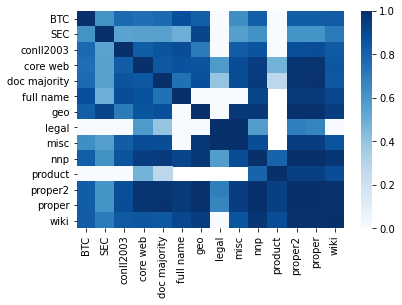

In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ind = [0, 2, 6,8,15, 16,18, 23, 24, 36, 39, 40, 41,  47]
ig = [" ".join(labelling.SOURCE_NAMES[k].split("_")[:-1]) if  "_" in labelling.SOURCE_NAMES[k] else labelling.SOURCE_NAMES[k]  for k in ind ]
ncf = cf / (cf + df)
ax = sns.heatmap(ncf[np.ix_(ind, ind)], cmap="Blues", xticklabels=ig, yticklabels=ig)
plt.show()

In [101]:

import labelling

# sources_to_use = [l for l in labelling.SOURCE_NAMES if "conll2003" not in l]
# unified_model = labelling.HMMAnnotator(sources_to_use)

# unified_model.load("./data/hmm_conll2003.pkl")

docs = list(annotations.docbin_reader("./data/conll2003.docbin"))

# unified_model.annotate(docs[0])

annotations.display_entities(docs[12], "HMM")
print("-------------------------------------------------------------------------------------------------------------")

annotations.display_entities(docs[12])





-------------------------------------------------------------------------------------------------------------
